# Lending Club Case Study Notebook

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualisations to understand the presence and distribution of missing data within a pandas dataframe
import missingno as msno

# Regular expression
import re

import warnings
warnings.simplefilter("ignore")

In [4]:
# Read CSV file and check all the attributes
# Parameter low_memory=False to remove warning related to dtype

loan_df = pd.read_csv("loan.csv", low_memory=False)

In [5]:
# let's check Cardinality and Basic Information about the loan dataset


# Number of rows and columns
print(f"Number of Rows: {loan_df.shape[0]}")
print(f"Number of Columns: {loan_df.shape[1]}")

# Number of missing values
print('Number of missing values: ', loan_df.isnull().sum().sum())

# Number of unique values
print('Number of unique values:', loan_df.nunique().sum())

# Number of duplicates
print('Number of duplicates:', loan_df.duplicated().sum())

print("\n\n")

print(f"Loan Data Types: \n{loan_df.dtypes}")
print("\n")

print(f"Loan Data Info: \n")
print(loan_df.info())
print("\n")


# Dataframe has 39717 rows and 111 columns.
# Dataframe has 3 types datatypes float64, int64 and object
# Size of the file is 33.6+ MB

Number of Rows: 39717
Number of Columns: 111
Number of missing values:  2263364
Number of unique values: 416801
Number of duplicates: 0



Loan Data Types: 
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


Loan Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None




In [6]:
# Let's have a look of some loan records
loan_df.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  

[2 rows x 111 columns]

In [7]:
# Let's check row wise duplicate records in load data set based on load id ('id' column)
print(loan_df.duplicated(subset=None, keep='first').count())

loan_df[loan_df.duplicated(subset=['id'])]
# Now we can see no duplicated records found.

39717


Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

[0 rows x 111 columns]

In [8]:
# let's check columns wise null record counts

print(loan_df.isna().sum())
print('\n')
# We can see that there are columns with null records

# let's check columns wise null record percentage
(loan_df.isna().sum() / len(loan_df)) * 100
# We can see that there are a few columns with 100% null values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64




id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

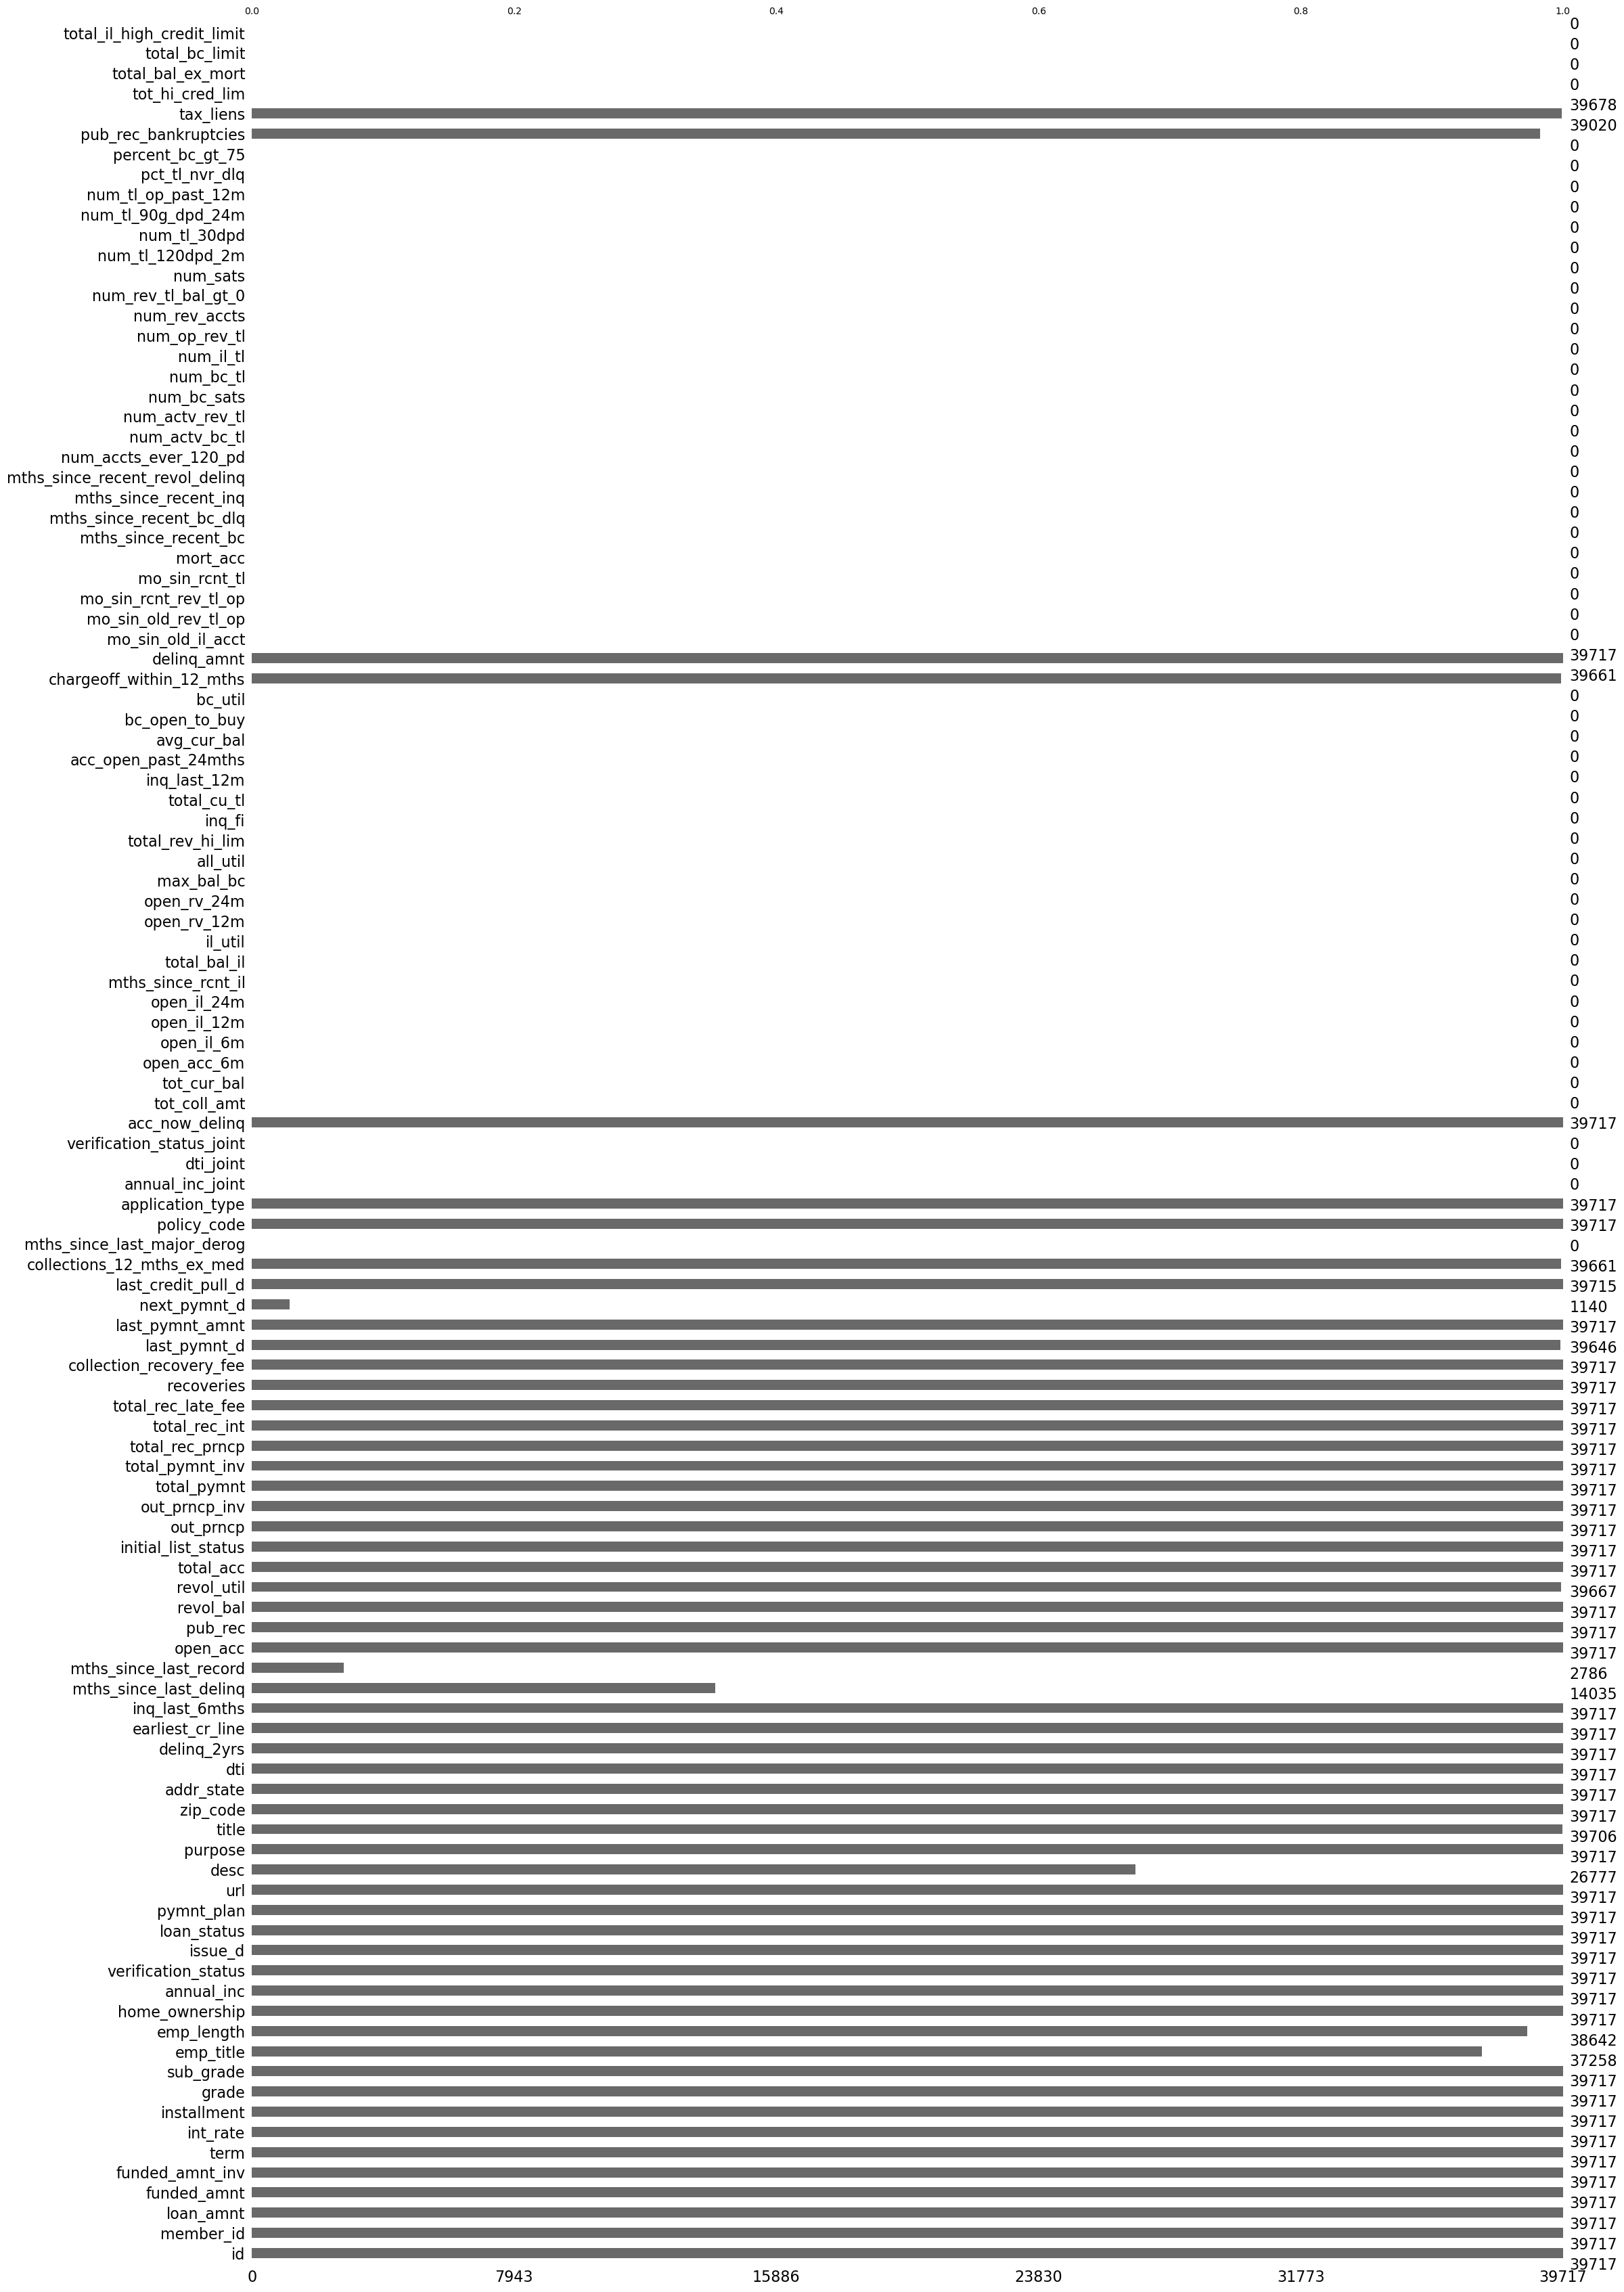

In [9]:
# let's visualise coluns missing values in chart using missingno
msno.bar(loan_df)
plt.show()

In [10]:
# Let have a look on loan data stats
loan_df.describe()

# We can find the min, max, mean, IQR etc values for dataframe columns

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [11]:
# Let's deep look into datatypes of columns
# Using verbose=True, we can visually see all the columns and it's datatype
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [12]:
# Column wise datatype analysis
print('Term column datatype analysis \n')

print(loan_df['term'].value_counts())
# So, we can see term in a string value and should be converted to numeric as part of data cleaning

Term column datatype analysis 

 36 months    29096
 60 months    10621
Name: term, dtype: int64


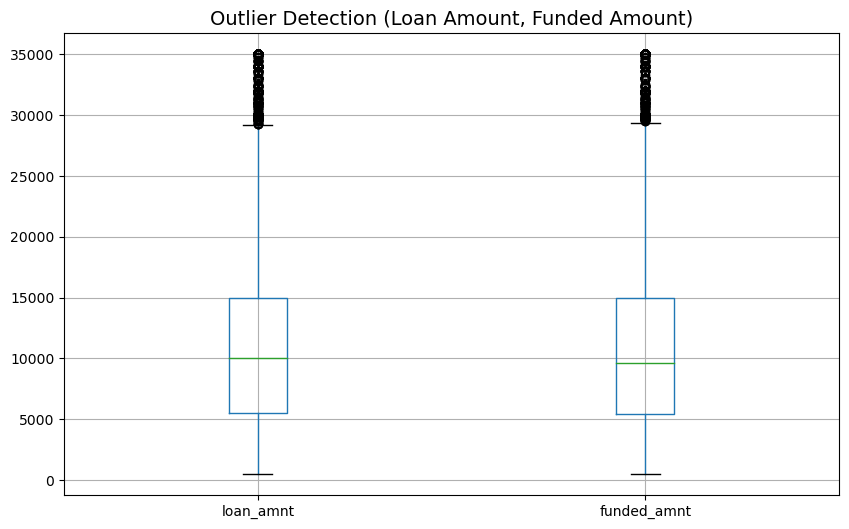

In [13]:
# Outliers detection during data understanding
plt.figure(figsize=(10, 6))
outlier_columns = ['loan_amnt', 'funded_amnt']
axis = loan_df.boxplot(column=outlier_columns)
axis.set_title('Outlier Detection (Loan Amount, Funded Amount)', fontsize=14)
plt.show()

## Data Cleansing

### Cleaning Empty Rows

In [14]:
#  Descriptive Columns Names
descriptive_column_names = {
    "loan_amnt": "Loan Amount",
    "funded_amnt": "Funded Amount",
    "funded_amnt_inv": "Investor Funded Amount",
    "term": "Term",
    "int_rate": "Interest Rate",
    "installment": "Installment",
    "grade": "Grade",
    "sub_grade": "Sub Grade",
    "dti": "Debt to Income",
    "issue_month": "Issue Month",
    "issue_year": "Issue Year",
    "annual_inc": "Annual Income",
    "emp_length": "Employee Length",
    "pub_rec_bankruptcies": "Public Record Bankruptcies"
}

In [15]:
# Check for empty columns
empty_columns = loan_df.columns[loan_df.isna().all()].tolist()

print(f"No of empty Columns: {len(empty_columns)} \n")
print(f"Empty Columns List: \n {empty_columns}")

No of empty Columns: 54 

Empty Columns List: 
 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex

In [16]:
# removing empty columns
loan_df.dropna(how='all', axis=1, inplace=True)

print(f"After removing empty columns, shape - {loan_df.shape}")

After removing empty columns, shape - (39717, 57)


In [17]:
# Check for empty rows
# loan_df[loan_df.isnull().all(axis=1)]
loan_df.dropna(how='all', axis=0, inplace=True)
loan_df.shape
# No empty rows found

(39717, 57)

In [18]:
loan_df.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  

[2 rows x 57 columns]

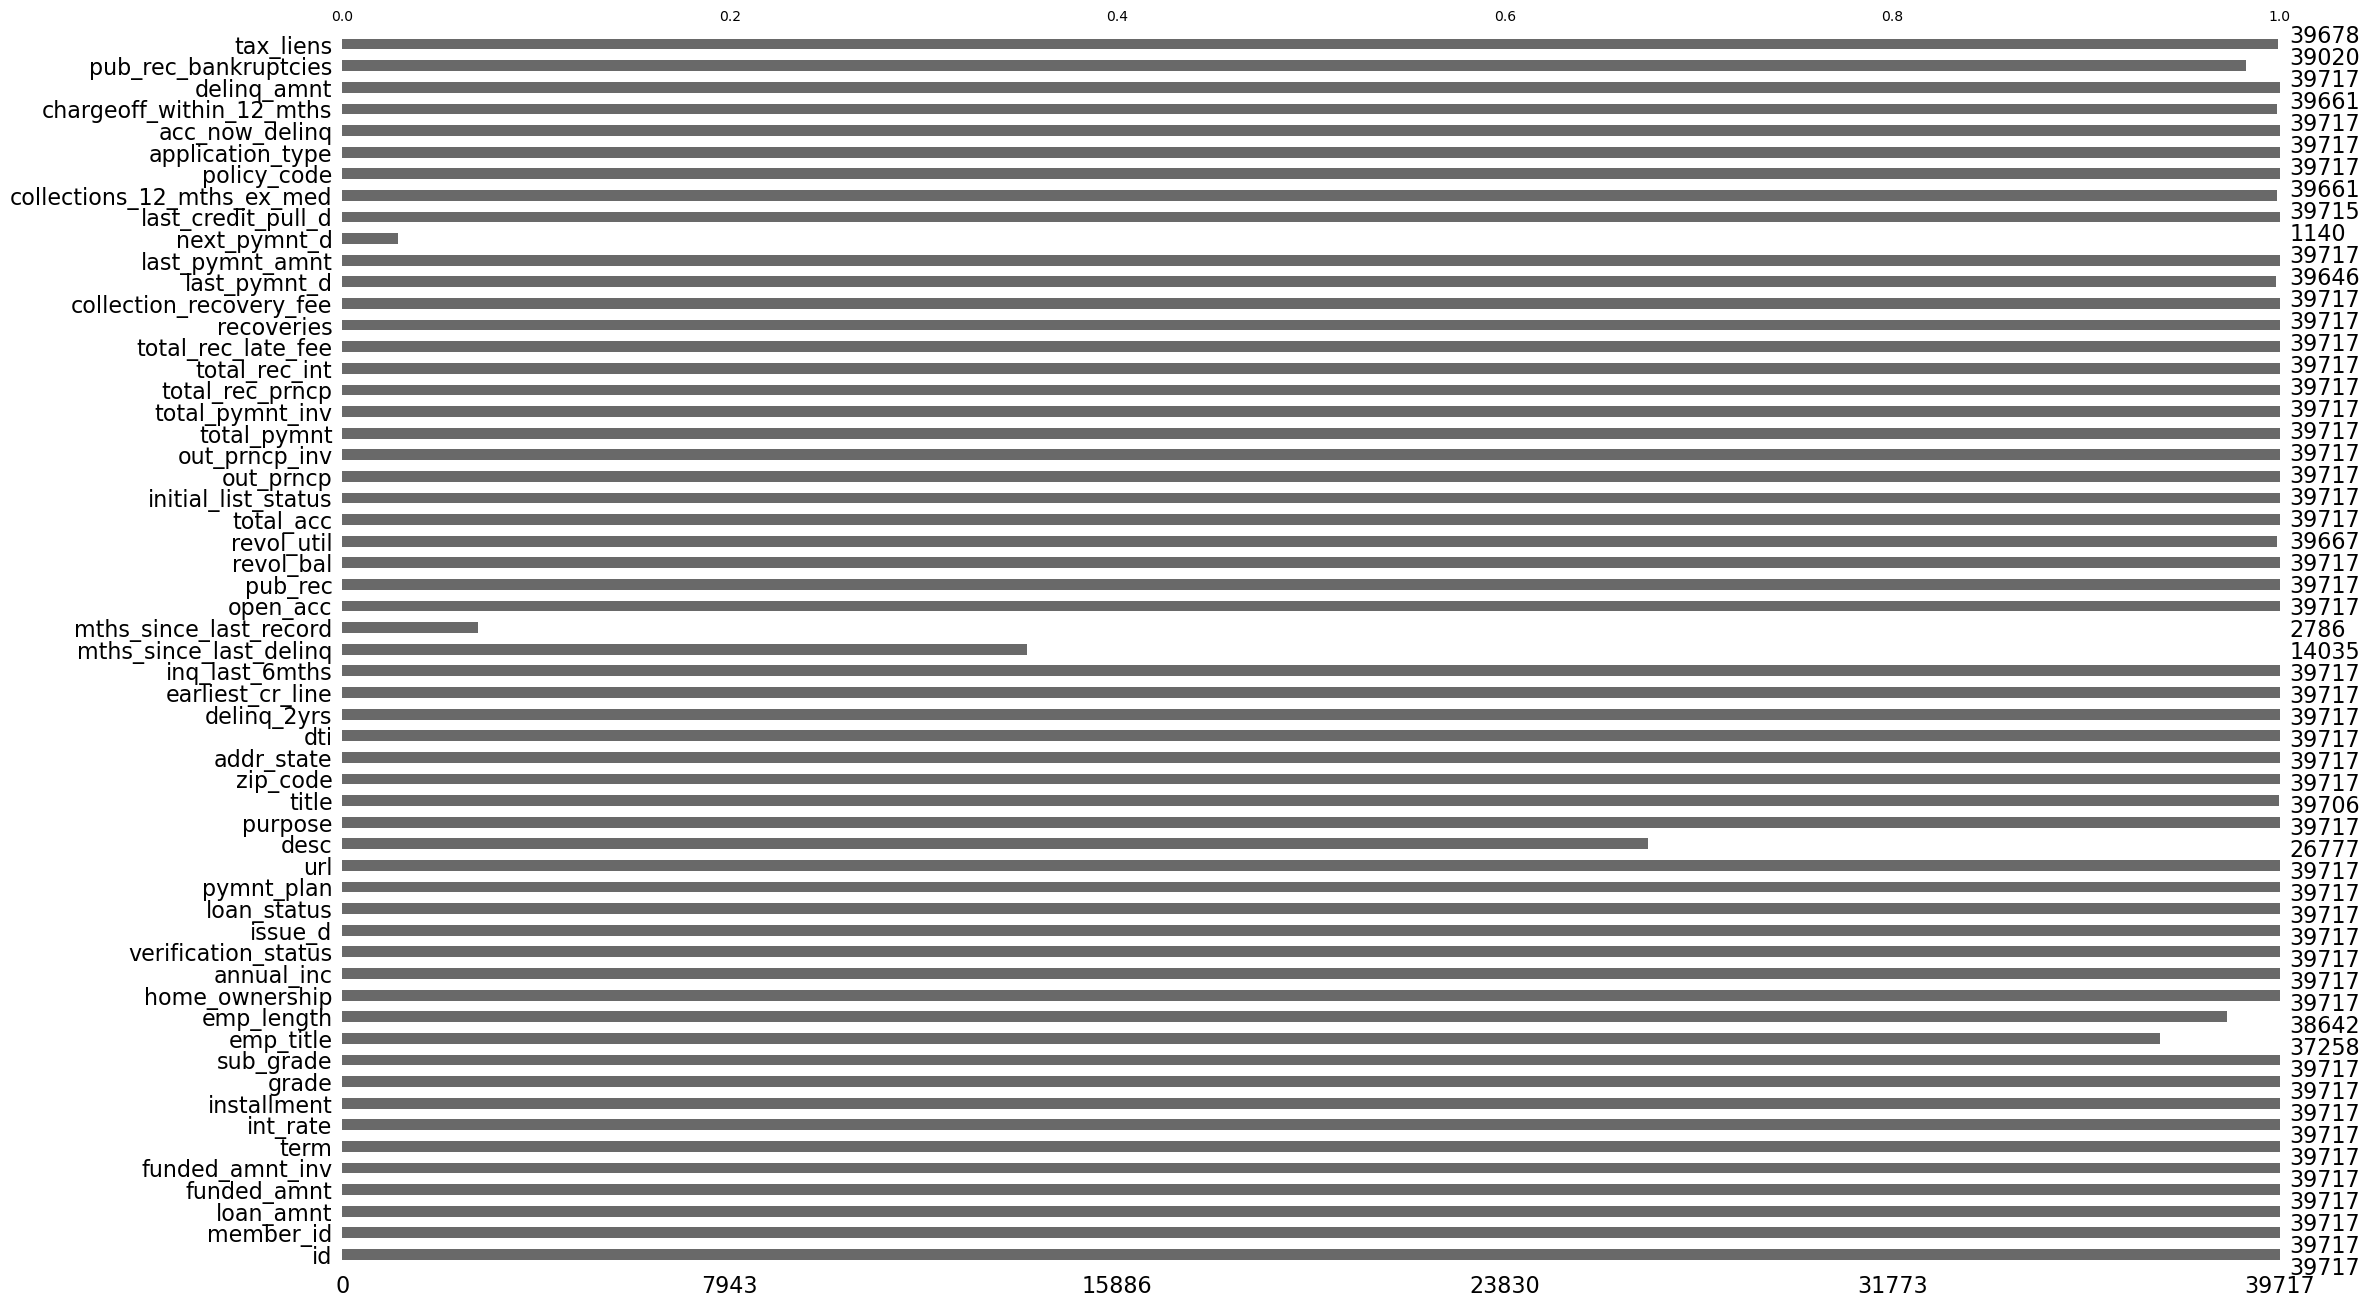

In [19]:
# let's visualise coluns missing values in chart using missingno
# The corresponding visualization will help us find out columns with missinng value
msno.bar(loan_df)
plt.show()

# We can see see that we have a few columns with partially null value

### Lets cleanup columns which are required for analysis

In [20]:
loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [21]:
# extract the month from term column.
# extract 36 from column value "36 month"
loan_df["term"] = loan_df.term.str.extract("(\d+)")

# Remove % from int_rate value
loan_df["int_rate"] = loan_df.int_rate.str.rstrip('%')

# Cleanup "emp_length" column and fill the missing values with 0
loan_df["emp_length"].fillna('0', inplace=True)
loan_df["emp_length"] = loan_df.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year',''))

# Lets Cleanup "emp_title" column and fill the missing values with 'Not Available'
loan_df["emp_title"].fillna('Not Available', inplace=True)

# Lets Cleanup "pub_rec_bankruptcies" column and fill the missing values with 'Not Available'
loan_df["pub_rec_bankruptcies"].fillna('Not Available', inplace=True)

# Remove % from int_rate value
loan_df["revol_util"] = loan_df.revol_util.str.rstrip('%')

In [22]:
loan_df.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv term int_rate  \
0  1077501    1296599       5000         5000           4975.0   36    10.65   
1  1077430    1314167       2500         2500           2500.0   60    15.27   

   installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0       162.87     B        B2  ...          NaN             May-16   
1        59.83     C        C4  ...          NaN             Sep-13   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  

[2 rows x 57 columns]

In [23]:
# Let's drop the columns which are not applicable for first time loan applicant
columns_to_drop = ["delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", 'mths_since_last_delinq', 'policy_code', 'mths_since_last_record']
print(f"Loan shape before dropping {loan_df.shape}")
loan_df.drop(columns=columns_to_drop, inplace=True)
print(f"Loan shape before dropping {loan_df.shape}")

Loan shape before dropping (39717, 57)
Loan shape before dropping (39717, 34)


In [24]:
# Let's drop uncessary columns as these columns has one value only so it is not required for analysis.
# "zip_code" has incompleted value. e.g- 814xx

unsued_columns = ['id','member_id','title','url','pymnt_plan','desc', 'zip_code', 'initial_list_status', 'application_type', 'tax_liens', "chargeoff_within_12_mths", "next_pymnt_d", "collections_12_mths_ex_med", "acc_now_delinq", "delinq_amnt"]
print(f"Loan shape before dropping {loan_df.shape}")
loan_df.drop(columns=unsued_columns, inplace=True)
print(f"Loan shape after dropping {loan_df.shape}")

Loan shape before dropping (39717, 34)
Loan shape after dropping (39717, 19)


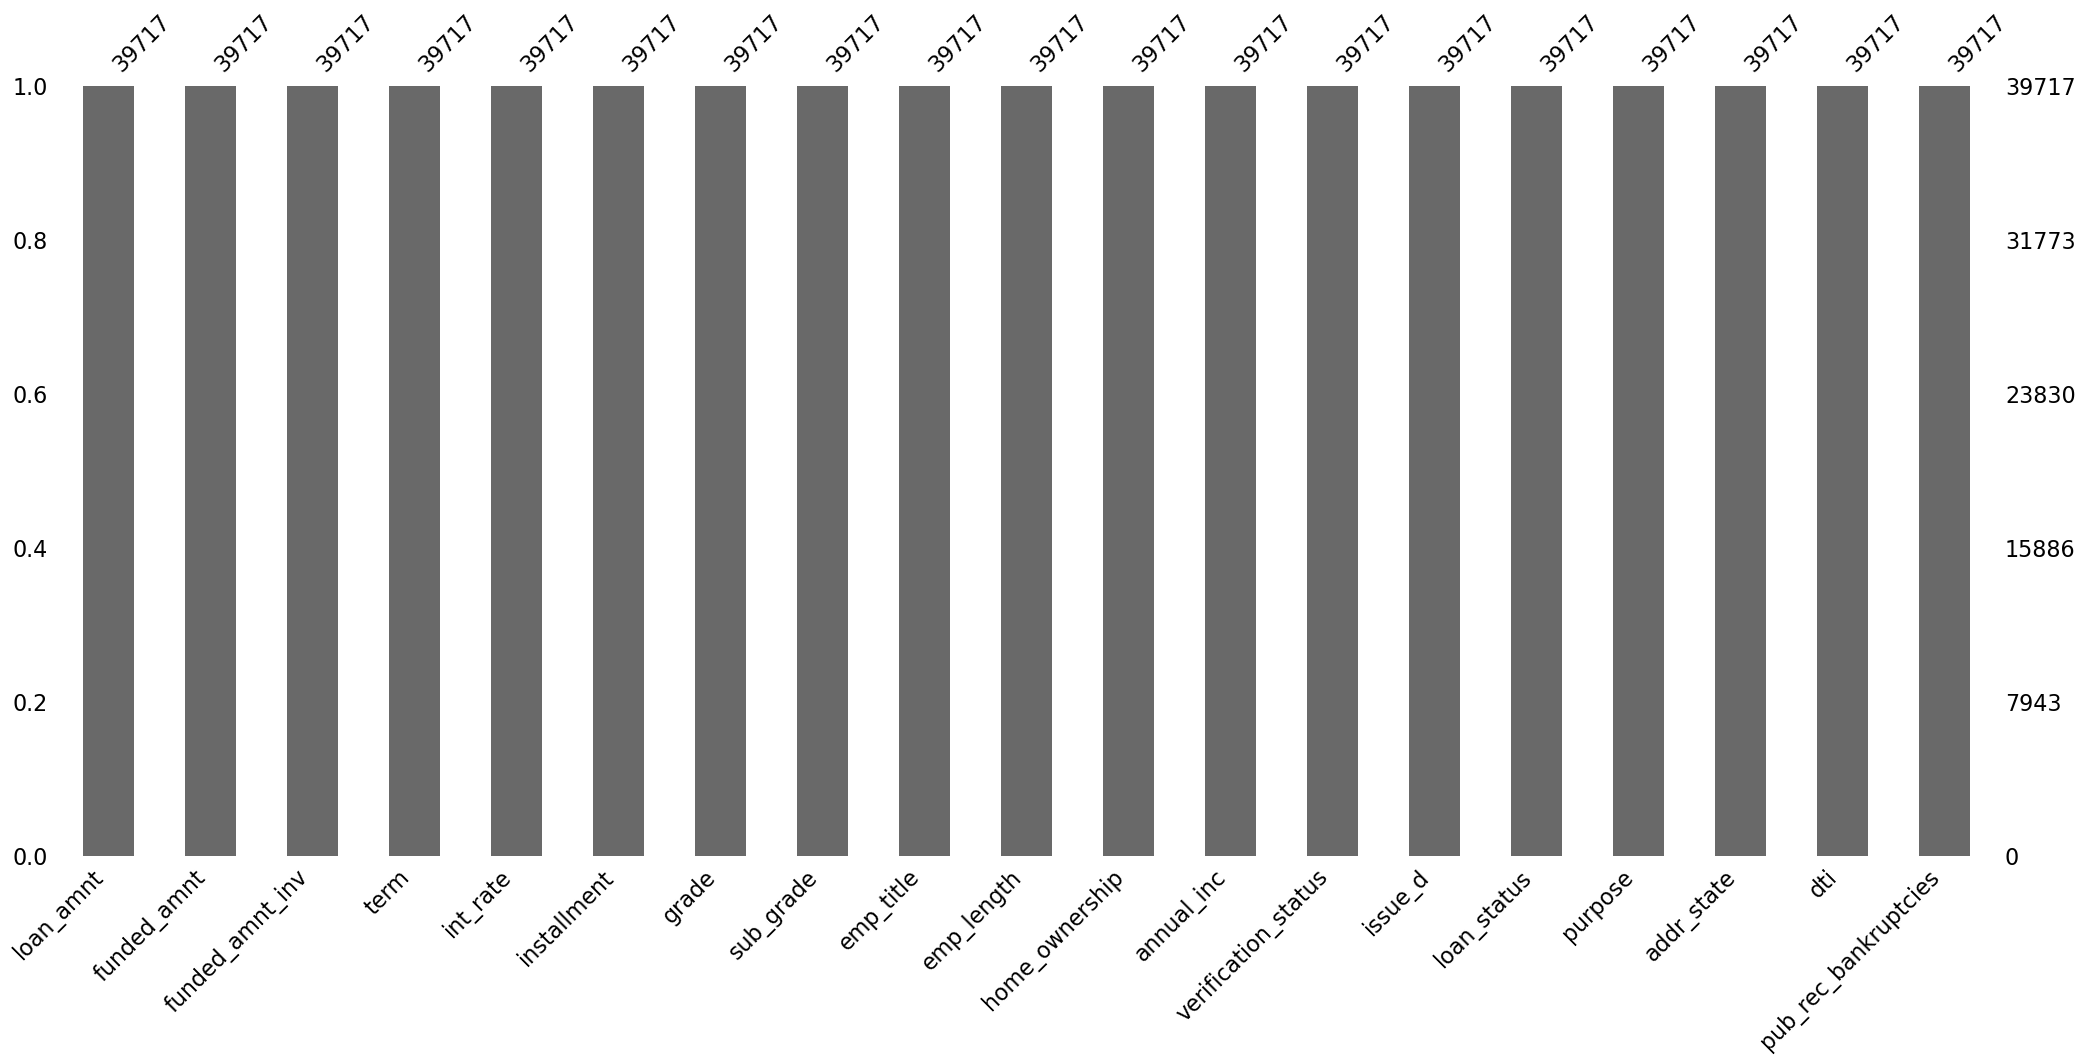

In [25]:
# After filling missing values, below is the visualization for column wise available value counts
msno.bar(loan_df)
plt.show()

In [26]:
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             39717 non-null  object 
 9   emp_length            39717 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [27]:
# Columns Data type conversion.
numeric_columns = ['term', 'int_rate', 'emp_length']
loan_df[numeric_columns] = loan_df[numeric_columns].apply(pd.to_numeric)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  int64  
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             39717 non-null  object 
 9   emp_length            39717 non-null  float64
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [28]:
loan_df.describe()

loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  39717.000000  39717.000000     39717.000000  39717.000000   
mean   11219.443815  10947.713196     10397.448868     42.418007   
std     7456.670694   7187.238670      7128.450439     10.622815   
min      500.000000    500.000000         0.000000     36.000000   
25%     5500.000000   5400.000000      5000.000000     36.000000   
50%    10000.000000   9600.000000      8975.000000     36.000000   
75%    15000.000000  15000.000000     14400.000000     60.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length    annual_inc           dti  
count  39717.000000  39717.000000  39717.000000  3.971700e+04  39717.000000  
mean      12.021177    324.561922      4.896530  6.896893e+04     13.315130  
std        3.724825    208.874874      3.530861  6.379377e+04      6.678594  
min        5.420000     15.690000      0.000000  4.000000e+03      0.000000  
25%        9.250000    167.020000      2.000000  4.040400e+04      8.170000  
50%       11.860000    280.220000      4.000000  5.900000e+04     13.400000  
75%       14.590000    430.780000      9.000000  8.230000e+04     18.600000  
max       24.590000   1305.190000     10.000000  6.000000e+06     29.990000

#### Outlier detection and treatment


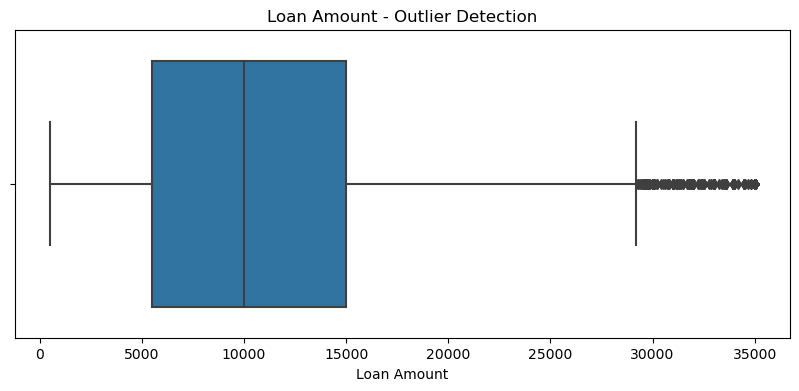

In [29]:
# Outlier detection for loan amount
plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=loan_df, x="loan_amnt")
ax.set_title("Loan Amount - Outlier Detection")
ax.set_xlabel("Loan Amount")
plt.show()

# We can see the that there are outlier in loan amount

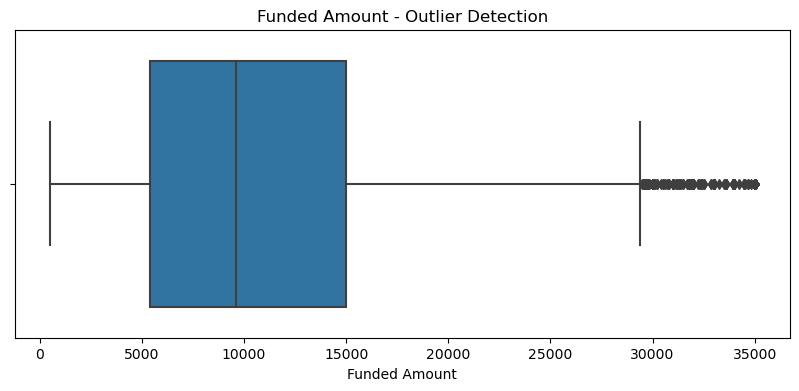

In [30]:
# Outlier detection for funded amount
plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=loan_df, x="funded_amnt")
ax.set_title("Funded Amount - Outlier Detection")
ax.set_xlabel("Funded Amount")
plt.show()
# We can see the that there are outlier in funded amount

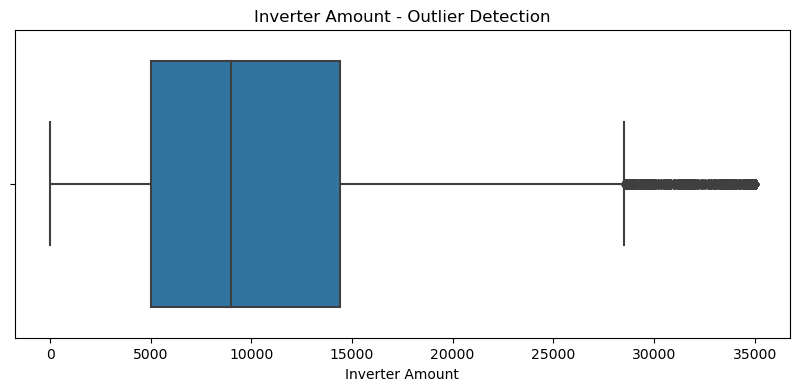

In [31]:
# Outlier detection for funded amount investor
plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=loan_df, x="funded_amnt_inv")
ax.set_title("Inverter Amount - Outlier Detection")
ax.set_xlabel("Inverter Amount")
plt.show()
# We can see the that there are outlier in funded amount investor

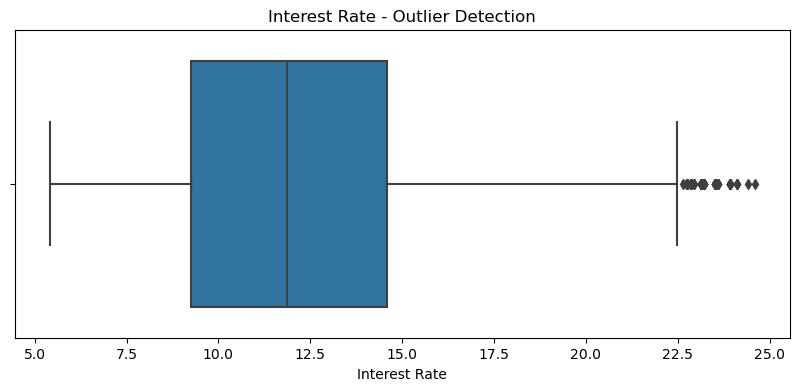

In [32]:
# Outlier detection for Interest Rate
plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=loan_df, x="int_rate")
ax.set_title("Interest Rate - Outlier Detection")
ax.set_xlabel("Interest Rate")
plt.show()
# We can see the that there are outlier in Interest Rate.

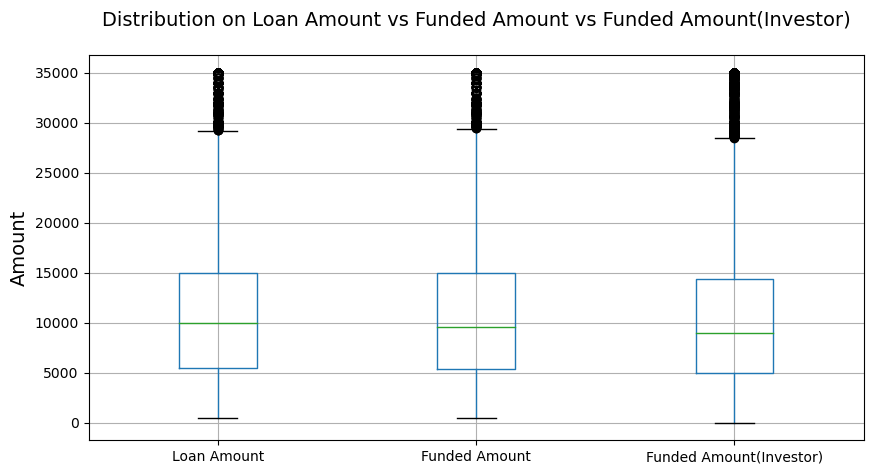

In [33]:
# Drawing box plot together for loan amunt, funded amount and funded amount investor
plt.figure(figsize=(10, 5))
contextual_column_names = {"loan_amnt": "Loan Amount", "funded_amnt": "Funded Amount", "funded_amnt_inv": "Funded Amount(Investor)"}
axes = loan_df[["loan_amnt", "funded_amnt", "funded_amnt_inv"]].rename(columns=contextual_column_names).boxplot()

axes.set_title('Distribution on Loan Amount vs Funded Amount vs Funded Amount(Investor)\n',fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

In [34]:
# Check the stats for loan amunt, funded amount and funded amount investor
loan_df[["loan_amnt", "funded_amnt", "funded_amnt_inv"]].rename(columns=contextual_column_names).describe()
# For Loan Amount 75th quantile is 15000 where as 100th quantile is 29900

Loan Amount  Funded Amount  Funded Amount(Investor)
count  39717.000000   39717.000000             39717.000000
mean   11219.443815   10947.713196             10397.448868
std     7456.670694    7187.238670              7128.450439
min      500.000000     500.000000                 0.000000
25%     5500.000000    5400.000000              5000.000000
50%    10000.000000    9600.000000              8975.000000
75%    15000.000000   15000.000000             14400.000000
max    35000.000000   35000.000000             35000.000000

In [35]:
# Lets Analyze more on the outlier on quartile range
loan_df.loan_amnt.quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.95, 0.97, 0.98, 0.99, 1.0])
# We clearly see after 98th quantile, here is a clear spike on loan amount distribution

0.91    24000.0
0.92    24250.0
0.93    25000.0
0.94    25000.0
0.95    25000.0
0.95    25000.0
0.97    30000.0
0.98    31468.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

In [36]:
# Remove outliers from loan amount
filtered_loan = loan_df[loan_df.loan_amnt <= loan_df.loan_amnt.quantile(0.98)]
print(loan_df.shape)
print(filtered_loan.shape)
# loan_df = filtered_loan
# We can see there are 1205 loan record comes as outliers and max value of loan pulled down


(39717, 19)
(38922, 19)


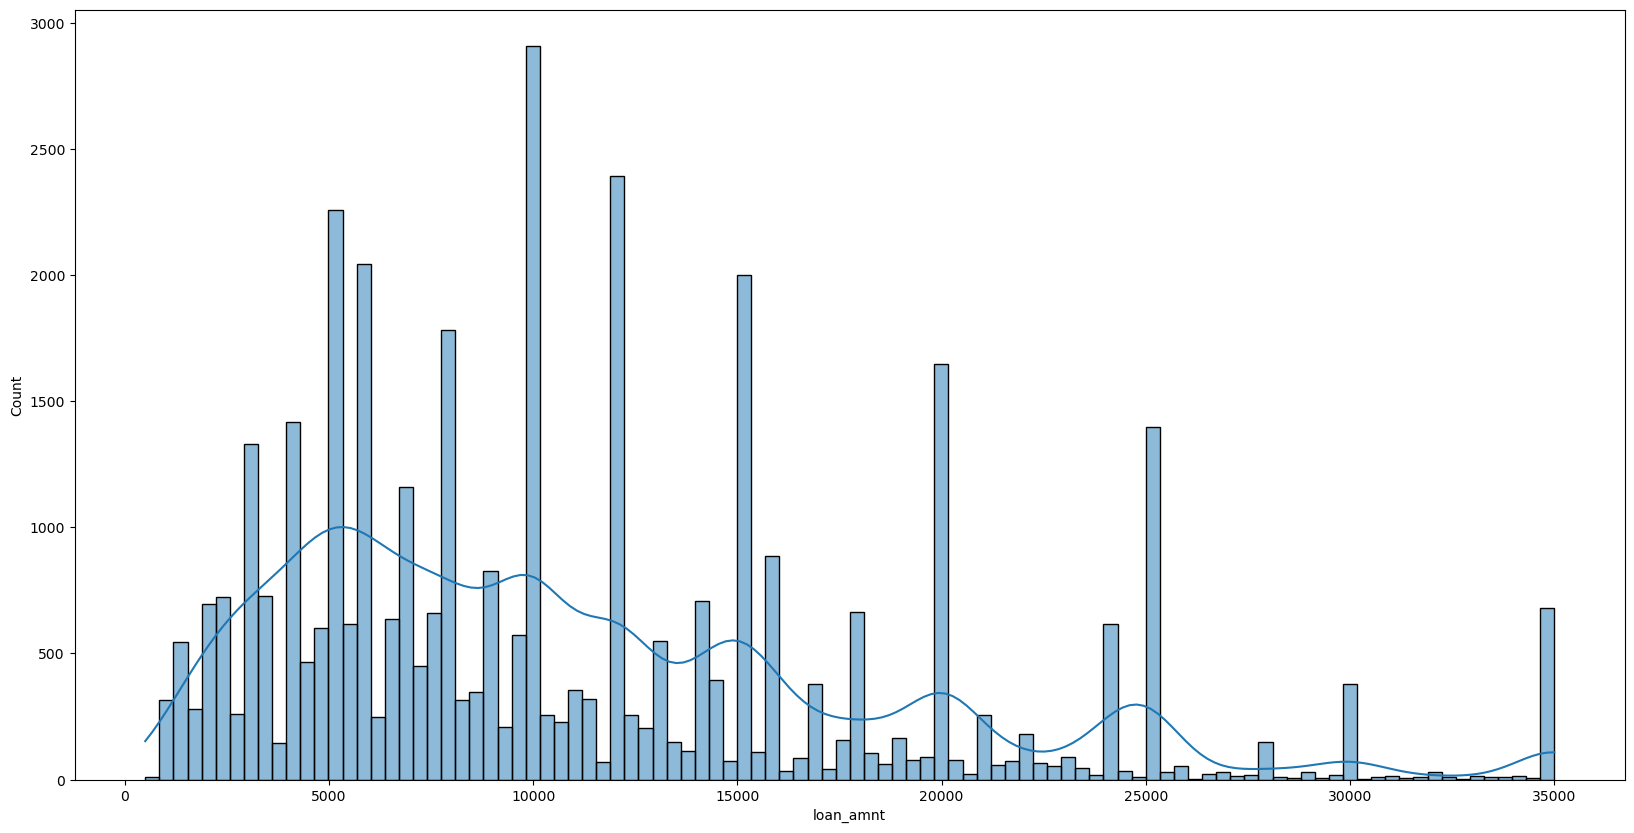

In [37]:
# let's see how much amount is funded by investor againest applied loan amount
plt.figure(figsize=(20, 10))
sns.histplot(loan_df.loan_amnt, bins=100, kde=True)
plt.show()
# As we can see from graph, majority of the loan amount us applied around 2k to 25k
# Some highfrequency observed near on 30,000 and 35,000

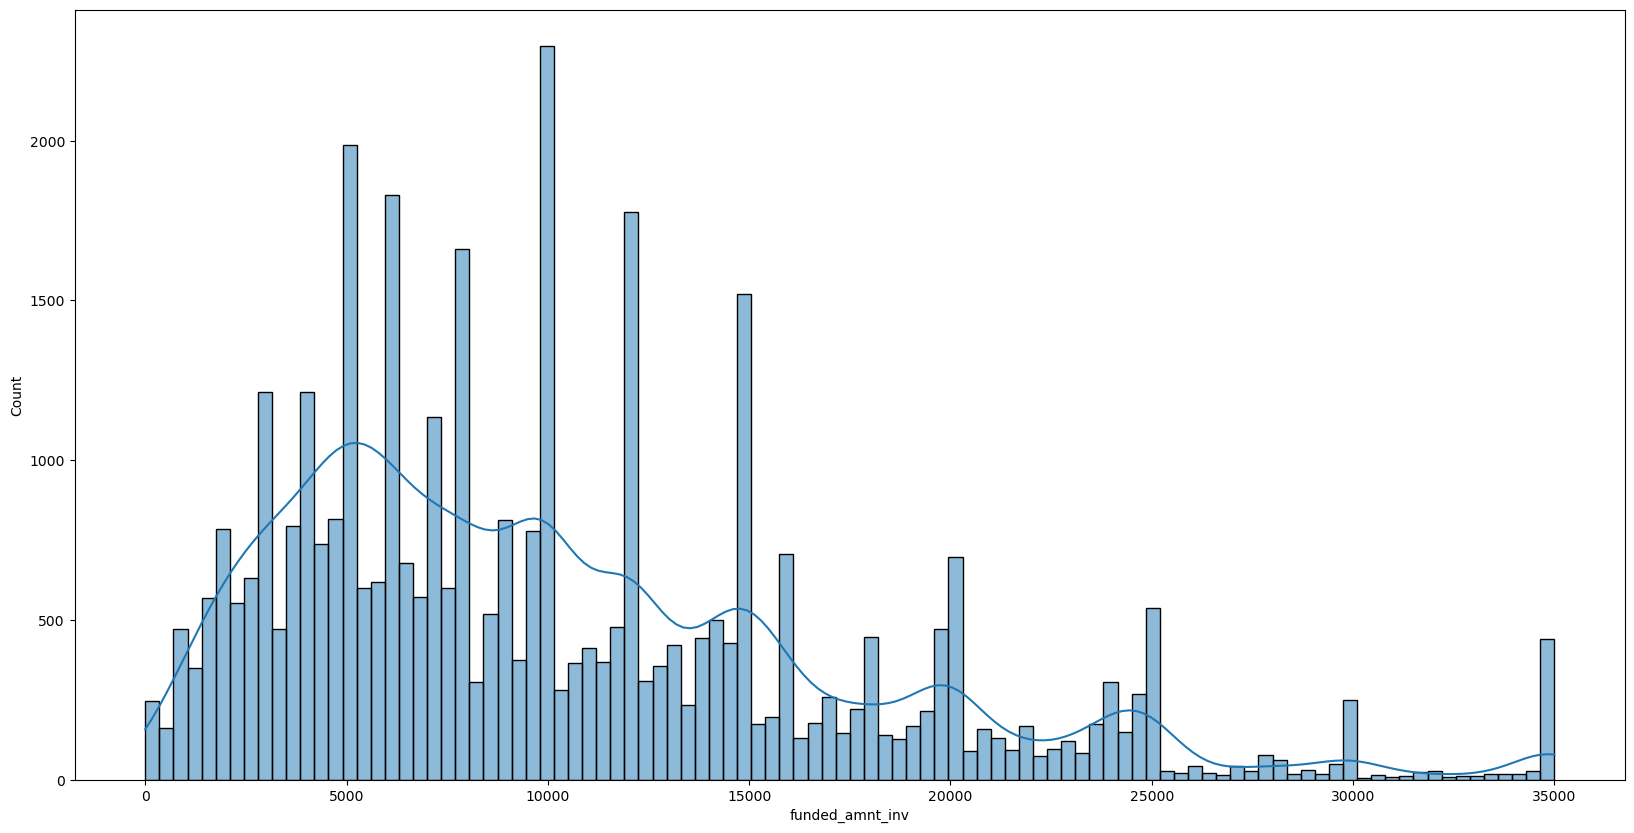

In [38]:
# let's see how much amount is funded by investor againest applied loan amount
plt.figure(figsize=(20, 10))
sns.histplot(loan_df.funded_amnt_inv, bins=100, kde=True)
plt.show()
# As we can see from graph, majority of the loan amount us applied around 2k to 25k
# Some highfrequency observed near on 30,000 and 35,000

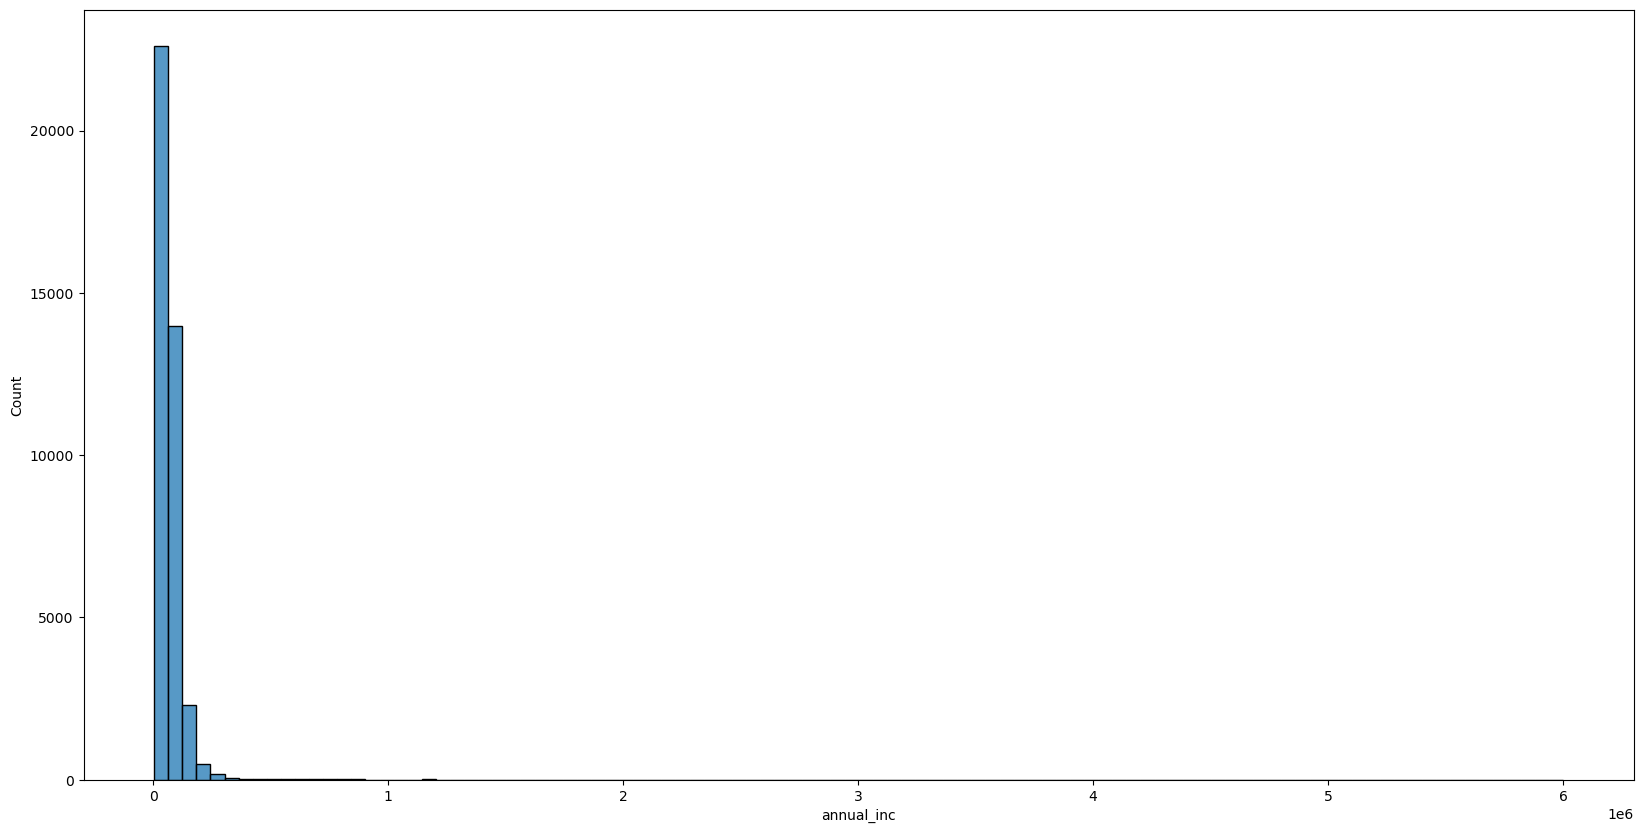

In [39]:
# Outlier Treatment
plt.figure(figsize=(20, 10))
sns.histplot(data=loan_df.annual_inc, bins=100)
plt.show() 
# Anual Income is right schewed due to high income applicants in the loan data

In [40]:
loan_df.annual_inc.quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.95, 0.97, 0.98, 0.99, 1.0])

# We clearly see after 99th quantile, here is a clear spike

0.91     120000.00
0.92     123000.00
0.93     128371.80
0.94     135000.00
0.95     142000.00
0.95     142000.00
0.97     165757.92
0.98     187000.00
0.99     234999.36
1.00    6000000.00
Name: annual_inc, dtype: float64

In [41]:
# Clearing the outliers due to which it was right schewed 

print(loan_df.shape)
loan_df = loan_df[loan_df.annual_inc <= loan_df.annual_inc.quantile(0.99)]
print(loan_df.shape)

(39717, 19)
(39319, 19)


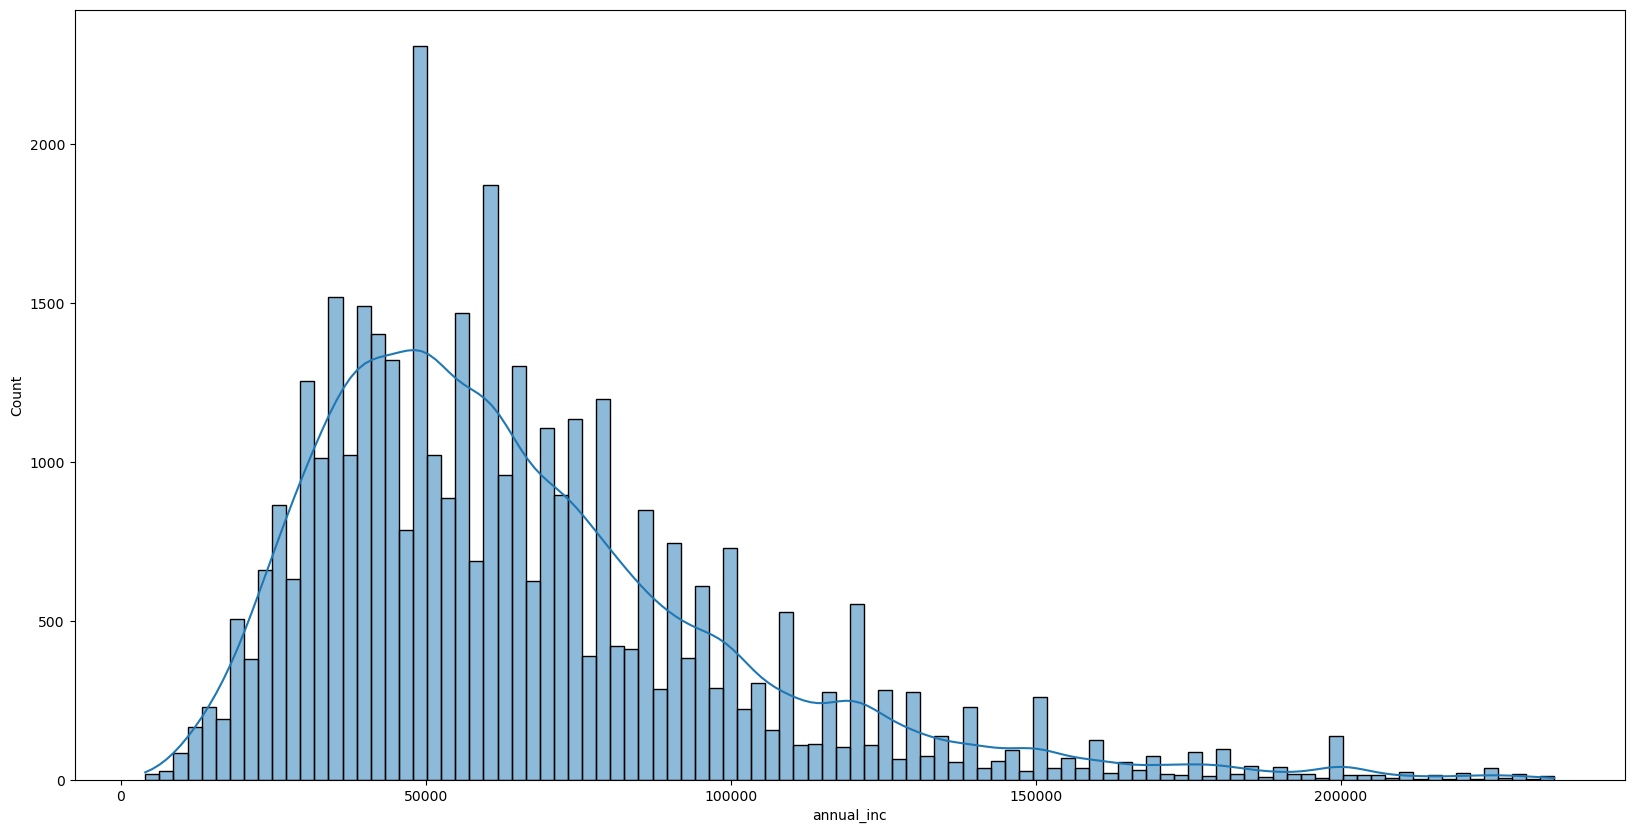

In [42]:
# annual_inc distruction after outlier treatment
plt.figure(figsize=(20, 10))
sns.histplot(data=loan_df.annual_inc, bins=100, kde=True)
plt.show()

In [43]:
loan_df.describe()

loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  39319.000000  39319.000000     39319.000000  39319.000000   
mean   11134.114550  10865.956662     10320.302968     42.408505   
std     7376.086312   7108.680268      7049.759305     10.617818   
min      500.000000    500.000000         0.000000     36.000000   
25%     5400.000000   5300.000000      5000.000000     36.000000   
50%    10000.000000   9600.000000      8900.000000     36.000000   
75%    15000.000000  15000.000000     14270.949420     60.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length     annual_inc           dti  
count  39319.000000  39319.000000  39319.000000   39319.000000  39319.000000  
mean      12.006142    322.017733      4.886988   65524.215803     13.376622  
std        3.717367    206.206225      3.528182   35215.885297      6.663140  
min        5.420000     15.690000      0.000000    4000.000000      0.000000  
25%        9.250000    166.190000      2.000000   40000.000000      8.270000  
50%       11.830000    278.920000      4.000000   58000.000000     13.480000  
75%       14.540000    426.100000      9.000000   81000.000000     18.640000  
max       24.590000   1305.190000     10.000000  234996.000000     29.990000

## Data Analysis

#### Derived Columns

In [44]:
# Divide Annual Income to Buckets
annual_inc_buckets = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000]
annual_inc_bucket_labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 - 125000', '125000 - 150000', '150000 - 175000', '175000 - 200000', '200000 +']
loan_df['annual_inc_buckets'] = pd.cut(loan_df['annual_inc'], annual_inc_buckets, labels=annual_inc_bucket_labels)

# Divide Loan Amounts to Buckets
loan_amount_buckets = [0, 5000, 10000, 15000, 20000, 25000, 30000]
loan_amount_bucket_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000 - 25000', '25000+']
loan_df['loan_amnt_buckets'] = pd.cut(loan_df['loan_amnt'], loan_amount_buckets, labels=loan_amount_bucket_labels)

# Divide Funded Amounts to Buckets
funded_amnt_buckets = [0, 5000, 10000, 15000, 20000, 25000, 30000]
funded_amnt_bucket_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000 - 25000', '25000+']
loan_df['funded_amnt_buckets'] = pd.cut(loan_df['funded_amnt'], funded_amnt_buckets, labels=funded_amnt_bucket_labels)

# Divide Funded Investor Amount to Buckets
funded_amnt_inv_buckets = [0, 5000, 10000, 15000, 20000, 25000, 30000]
funded_amnt_inv_bucket_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000 - 25000', '25000+']
loan_df['funded_amnt_inv_buckets'] = pd.cut(loan_df['funded_amnt_inv'], funded_amnt_inv_buckets, labels=funded_amnt_inv_bucket_labels)

# Divide Interest Rate to Buckets
int_rate_buckets = [0, 10, 12.5, 15, 17.5, 20, 25]
int_rate_bucket_labels = ['0-10', '10-12.5', '12.5-15', '15-17.5', '17.5-20', '20+']
loan_df['int_rate_buckets'] = pd.cut(loan_df['int_rate'], int_rate_buckets, labels=int_rate_bucket_labels)

# Divide DTI(Debt to Income) to Buckets
dti_buckets = [0, 5, 10, 15, 20, 25, 30]
dti_bucket_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25+']
loan_df['dti_buckets'] = pd.cut(loan_df['dti'], dti_buckets, labels=dti_bucket_labels)

# Extract Year and Month from Loan Issue Date
loan_df['issue_year'] = pd.to_datetime(loan_df['issue_d'], format="%b-%y").dt.year
loan_df['issue_month'] = pd.to_datetime(loan_df['issue_d'], format="%b-%y").dt.month

In [45]:
# let's check derived columns
loan_df.head(2)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   

  sub_grade      emp_title  emp_length  ...    dti  pub_rec_bankruptcies  \
0        B2  Not Available        10.0  ...  27.65                   0.0   
1        C4          Ryder         0.5  ...   1.00                   0.0   

  annual_inc_buckets loan_amnt_buckets funded_amnt_buckets  \
0            0-25000            0-5000              0-5000   
1        25000-50000            0-5000              0-5000   

  funded_amnt_inv_buckets int_rate_buckets  dti_buckets issue_year issue_month  
0                  0-5000          10-12.5          25+       2011          12  
1                  0-5000          15-17.5          0-5       2011          12  

[2 rows x 27 columns]

## Univariate Analysis

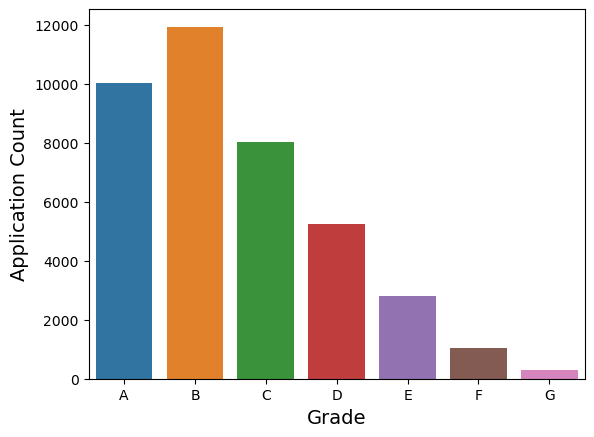

In [46]:
# Let's check the number of loans applied with different grade
sns.countplot(data=loan_df, x="grade", order=["A", "B", "C", "D", "E", "F", "G"])
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()
# We can see the most count is for B grade

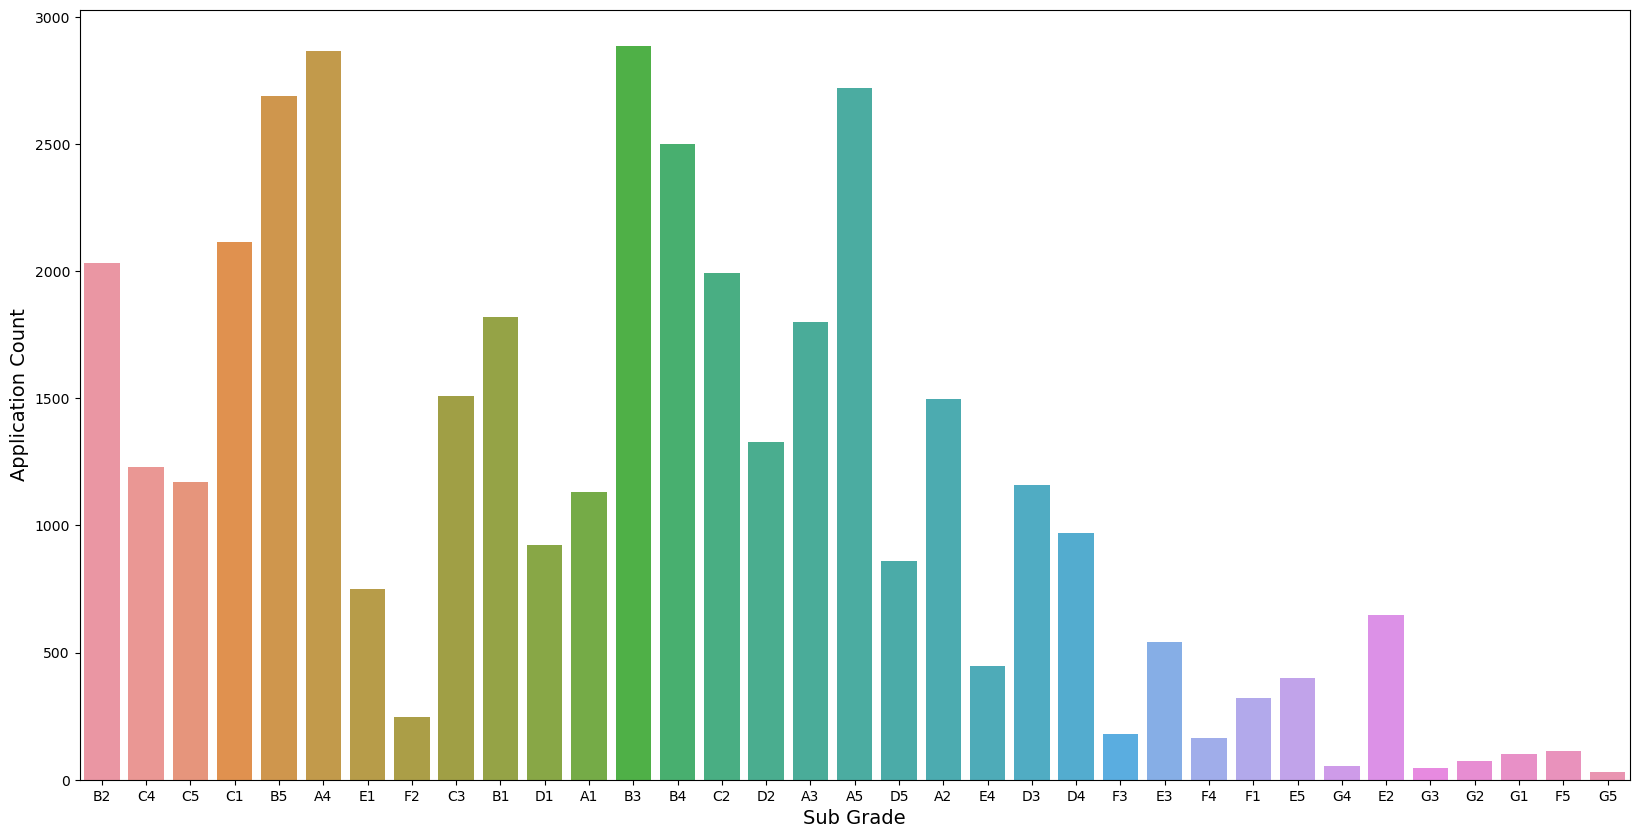

In [47]:
# Let's check the number of loans applied with different sub grade
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_df, x="sub_grade")
plt.xlabel('Sub Grade', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()
# We can see the most count is for A4 sub grade

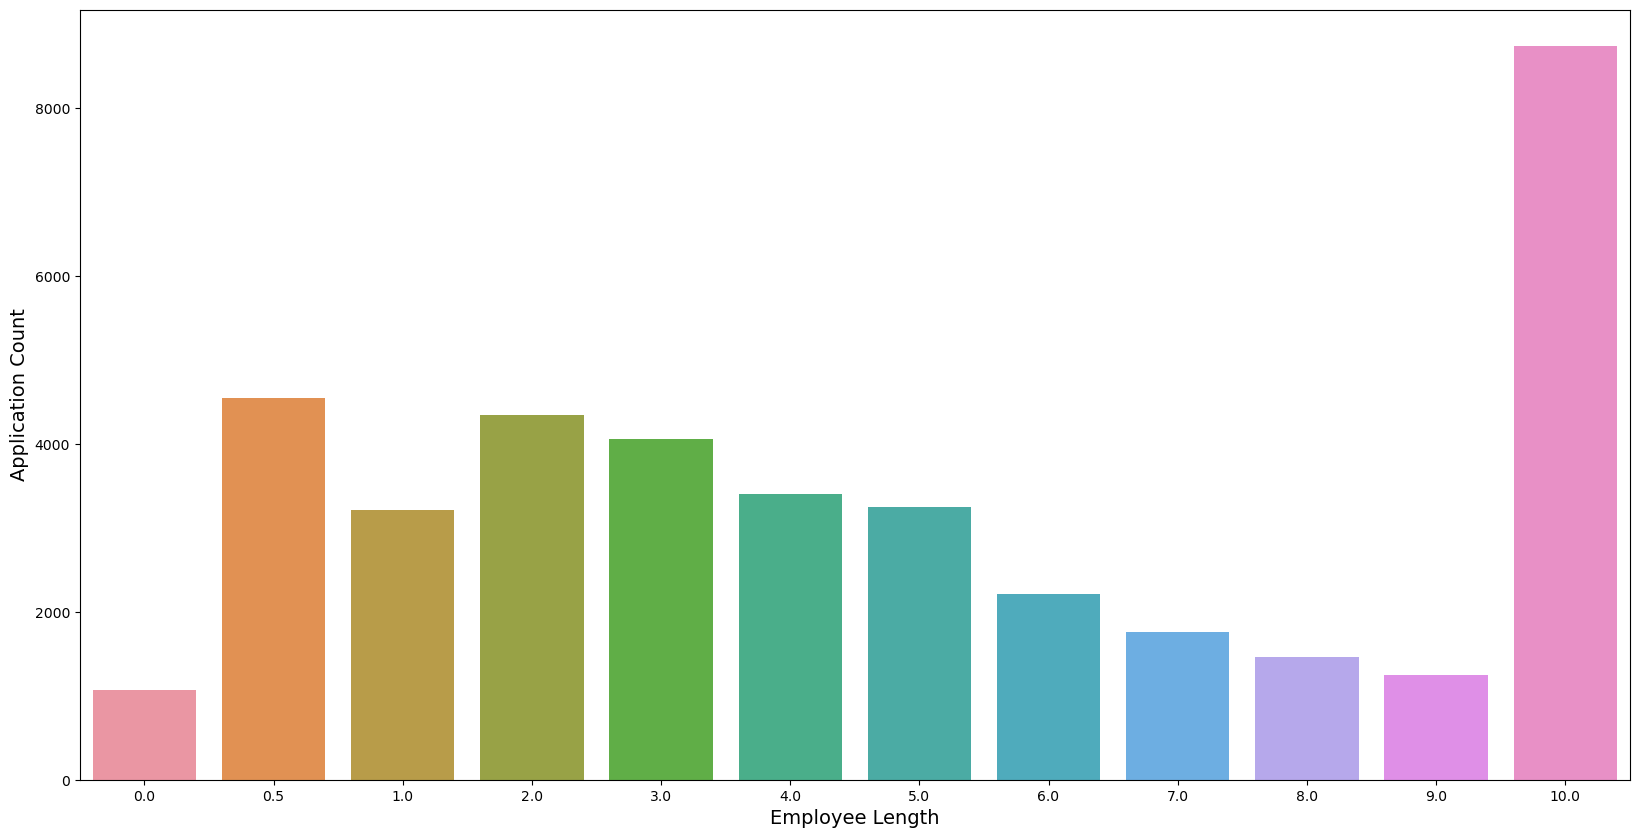

In [48]:
# Let's check the number of loans applied with different employment length
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_df, x="emp_length")
plt.xlabel('Employee Length', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()
# Loan applicants are getting decreased with employment length, until it reaches to 10.
# Applicants are high with 10+ employment.

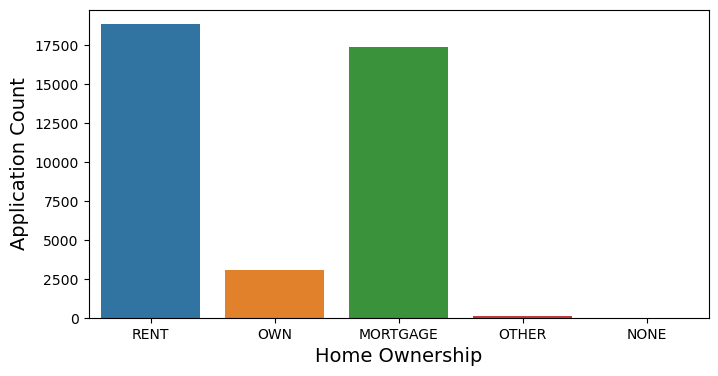

In [49]:
# Let's check the number of loans applied with home ownership
plt.figure(figsize=(8, 4))
sns.countplot(data=loan_df, x="home_ownership")
plt.xlabel('Home Ownership', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()
# We can see that majority of the applicants belongs to RENT or MORTGAGE category

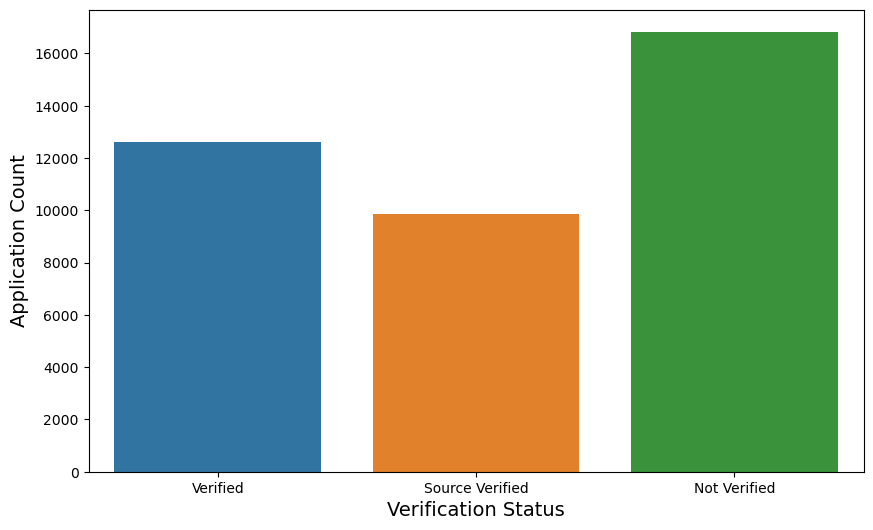

In [50]:
# Let's check the number of loans applied with verification_status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x="verification_status")
plt.xlabel('Verification Status', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()
# We can see that majority of the applications are Not Verified

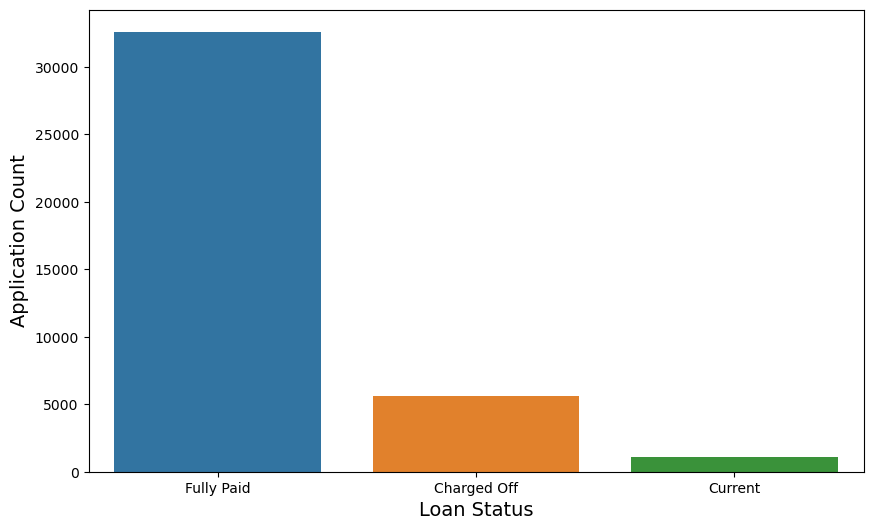

In [51]:
# Let's check the number of loans applied with loan_status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x="loan_status")
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()
# We can see that majority of the applicants are fully paid their previous loan

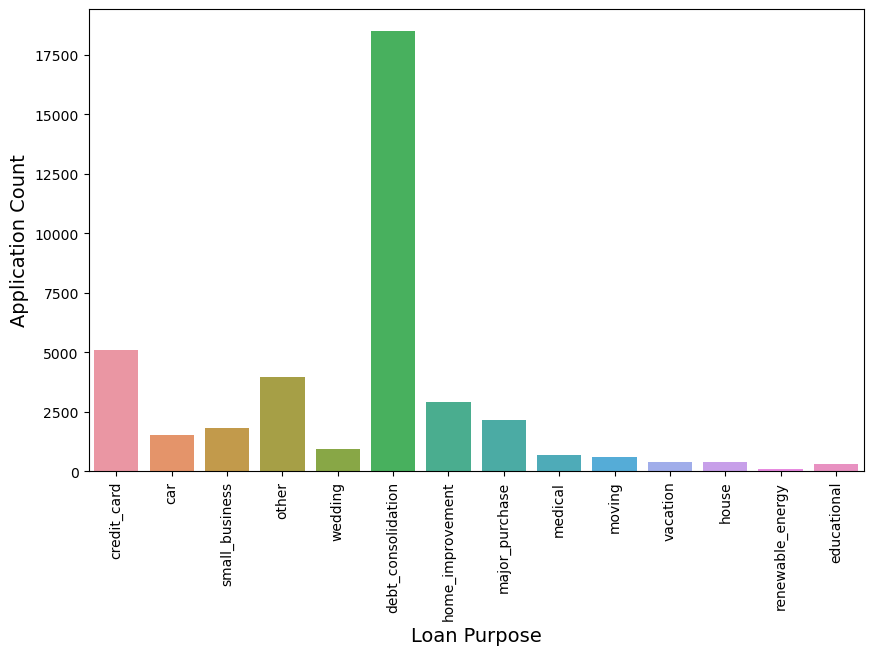

In [52]:
# Let's check the number of loans applied with Loan purpose
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x="purpose")
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()
# We can see that majority of the applicants applied loan with the purpose debt_consolidation

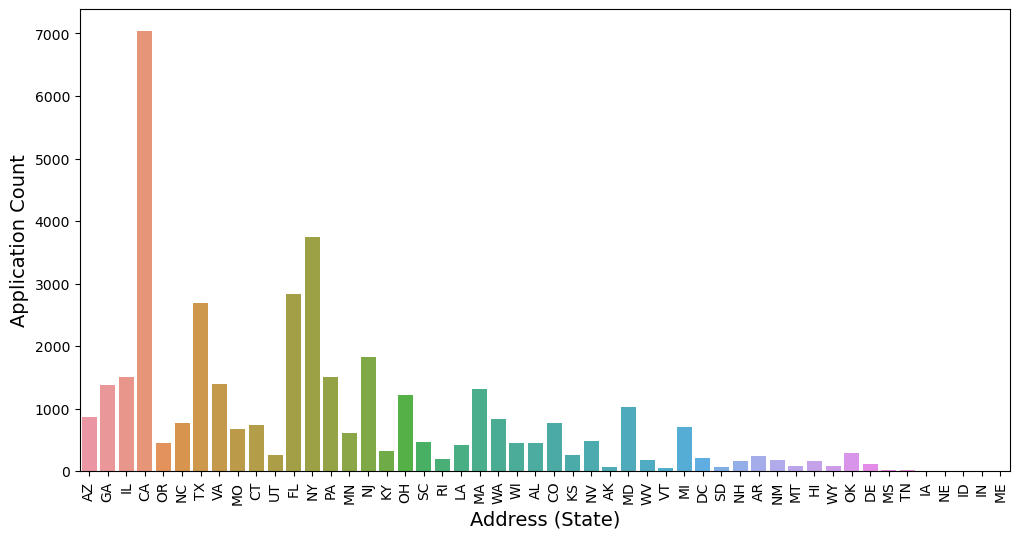

In [53]:
# Let's check the number of loans applied with different addr_state
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_df, x="addr_state")
plt.xlabel('Address (State)', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()
# We can see that max application are from CA state

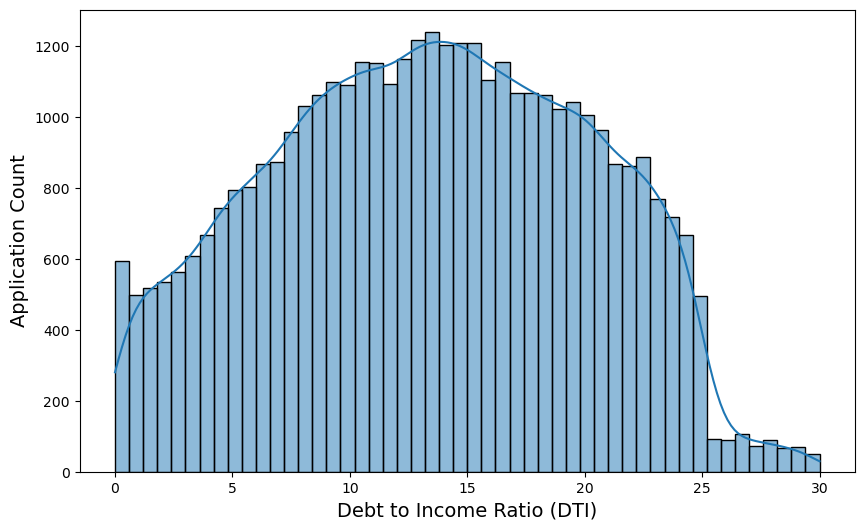

In [54]:
# Let's analyse the dti column
plt.figure(figsize=(10, 6))
sns.histplot(loan_df.dti, kde=True)
plt.xlabel('Debt to Income Ratio (DTI)', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()
# We can see value is increasing from initial to 15 and again goes down till 25

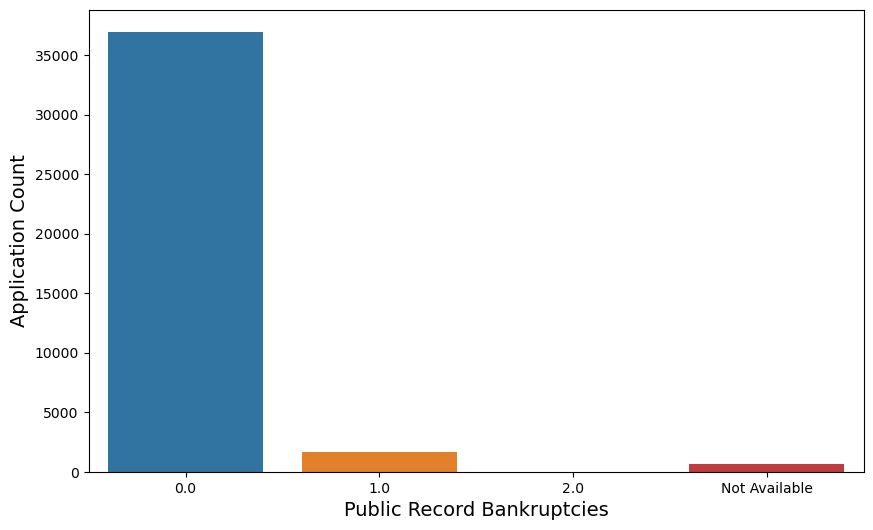

In [55]:
# Let's check the number of loans applied with different pub_rec_bankruptcies
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x="pub_rec_bankruptcies")
plt.xlabel('Public Record Bankruptcies', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()
# We can see most of the applicants has 0 pub_rec_bankruptcies record

### Segmented Univariate Analysis

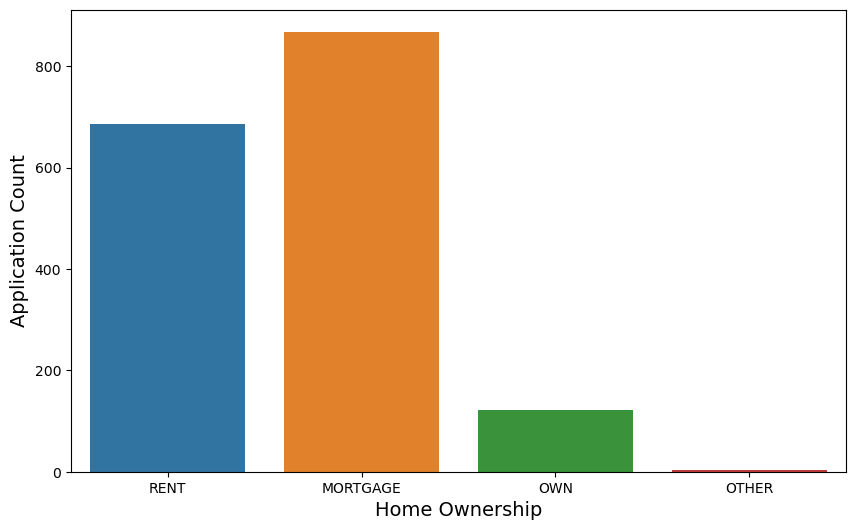

In [56]:
# Let's check the pub_rec_bankruptcies with value 1 and 2 records againest home_ownership
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df[loan_df.pub_rec_bankruptcies.isin([1, 2])], x="home_ownership")
plt.xlabel('Home Ownership', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()

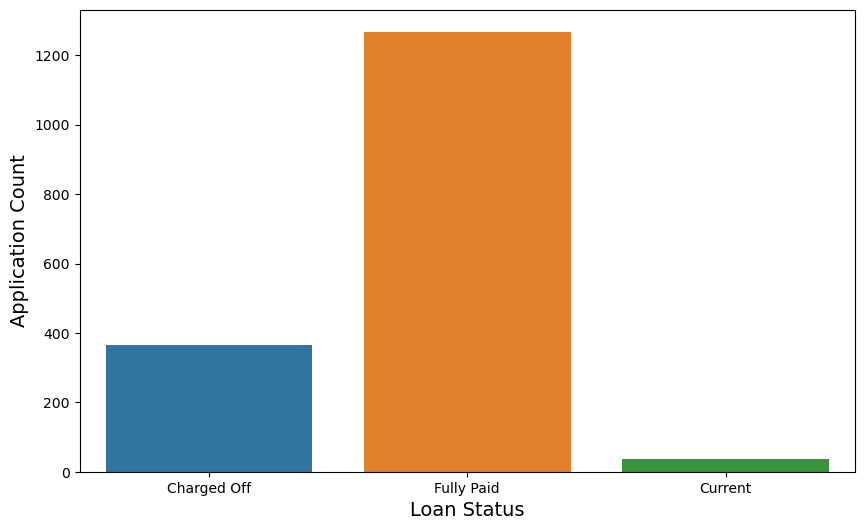

In [57]:
# Let's check the pub_rec_bankruptcies with value 1, againest loan_status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df[loan_df.pub_rec_bankruptcies.isin([1])], x="loan_status")
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()

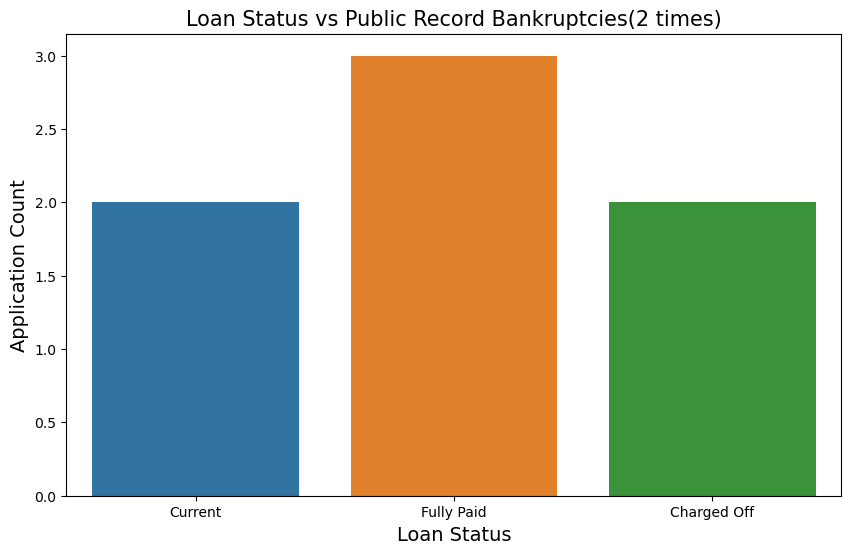

In [58]:
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(data=loan_df[loan_df.pub_rec_bankruptcies.isin([2])], x="loan_status")
ax1.set_title('Loan Status vs Public Record Bankruptcies(2 times)',fontsize=15)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()
# Charged Off getting increased for more Bankruptcies
# Charged Off is approx 22.5% for 1 times bankruptcies
# Charged Off getting increased to 33% for 2 times bankruptcies

### Bivariate Analysis

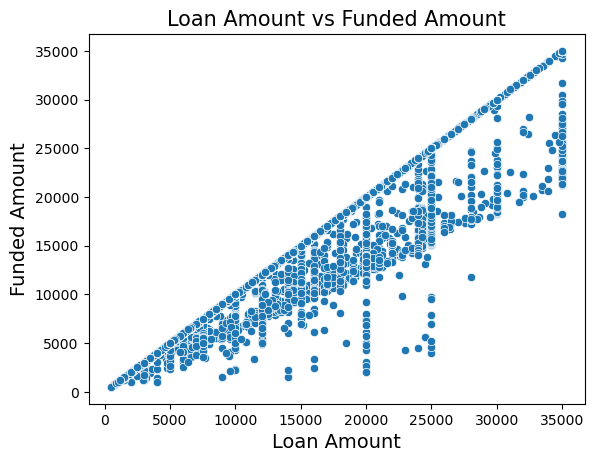

In [59]:
# loan_amnt vs funded_amnt
# scatter plot
axis = sns.scatterplot(data=loan_df, x="loan_amnt", y="funded_amnt")
axis.set_title('Loan Amount vs Funded Amount',fontsize=15)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Funded Amount', fontsize=14)
plt.show()
# We can see that we have less applicants with loan amount greater than 25k.
# Majority of the applicant paid less than applied loan amount

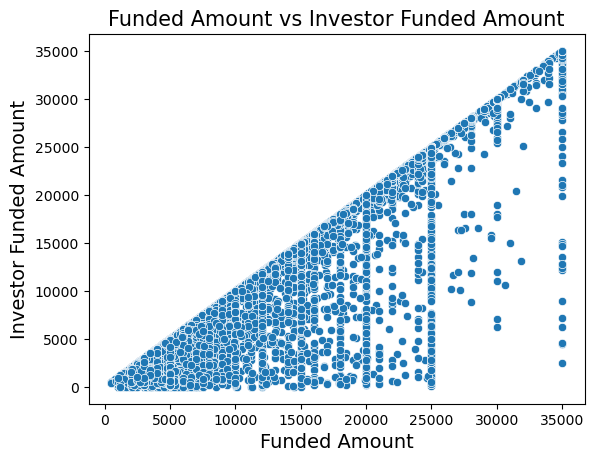

In [60]:
# funded_amnt vs funded_amnt_inv
# scatter plot
axis = sns.scatterplot(data=loan_df, x="funded_amnt", y="funded_amnt_inv")
axis.set_title('Funded Amount vs Investor Funded Amount',fontsize=15)
plt.xlabel('Funded Amount', fontsize=14)
plt.ylabel('Investor Funded Amount', fontsize=14)
plt.show()
# We can see that we have less applicants with loan amount greater than 25k.

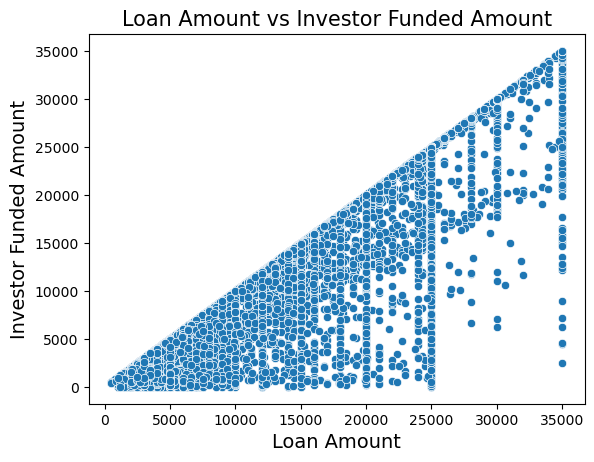

In [61]:
# loan_amnt vs funded_amnt_inv
axis = sns.scatterplot(data=loan_df, x="loan_amnt", y="funded_amnt_inv")
axis.set_title('Loan Amount vs Investor Funded Amount',fontsize=15)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Investor Funded Amount', fontsize=14)
plt.show()

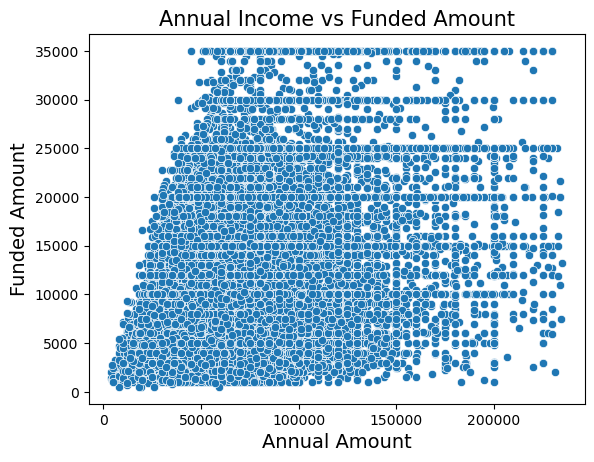

In [62]:
# annual_inc vs funded_amnt
axis = sns.scatterplot(data=loan_df, x="annual_inc", y="funded_amnt")
axis.set_title('Annual Income vs Funded Amount',fontsize=15)
plt.xlabel('Annual Amount', fontsize=14)
plt.ylabel('Funded Amount', fontsize=14)
plt.show()

In [63]:
# annual_inc vs int_rate
anual_income_vs_loan_status = loan_df.groupby(["annual_inc_buckets", "loan_status"]).count()
anual_income_vs_loan_status.reset_index(inplace=True)
anual_income_vs_loan_status.head()
# We can see that changed off are higher in the bucket of 25000-50000

annual_inc_buckets  loan_status  loan_amnt  funded_amnt  funded_amnt_inv  \
0            0-25000  Charged Off        488          488              488   
1            0-25000      Current         26           26               26   
2            0-25000   Fully Paid       2062         2062             2062   
3        25000-50000  Charged Off       2125         2125             2125   
4        25000-50000      Current        329          329              329   

   term  int_rate  installment  grade  sub_grade  ...  addr_state   dti  \
0   488       488          488    488        488  ...         488   488   
1    26        26           26     26         26  ...          26    26   
2  2062      2062         2062   2062       2062  ...        2062  2062   
3  2125      2125         2125   2125       2125  ...        2125  2125   
4   329       329          329    329        329  ...         329   329   

   pub_rec_bankruptcies  loan_amnt_buckets  funded_amnt_buckets  \
0                   488                488                  488   
1                    26                 26                   26   
2                  2062               2062                 2062   
3                  2125               2123                 2124   
4                   329                329                  329   

   funded_amnt_inv_buckets  int_rate_buckets  dti_buckets  issue_year  \
0                      484               488          473         488   
1                       26                26           26          26   
2                     2055              2062         2027        2062   
3                     2110              2125         2117        2125   
4                      329               329          329         329   

   issue_month  
0          488  
1           26  
2         2062  
3         2125  
4          329  

[5 rows x 27 columns]

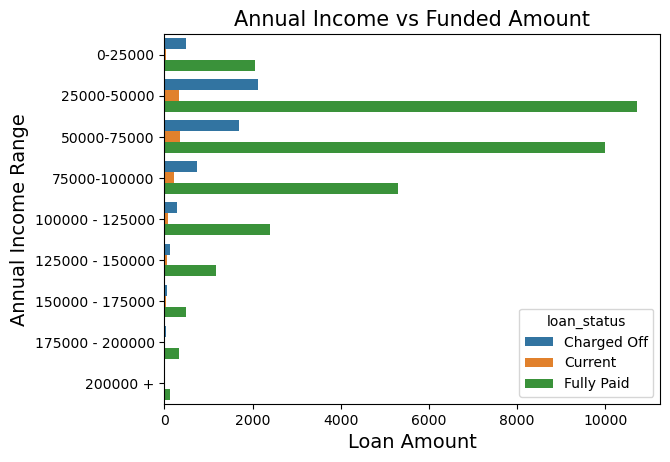

In [64]:
axis = sns.barplot(data=anual_income_vs_loan_status, y="annual_inc_buckets", x="loan_amnt", hue="loan_status")
axis.set_title('Annual Income vs Funded Amount',fontsize=15)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Annual Income Range', fontsize=14)
plt.show()

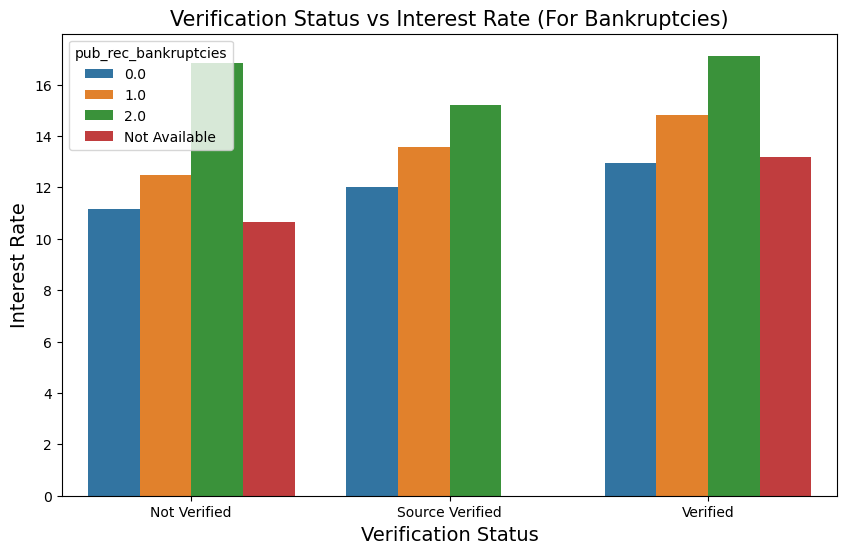

In [65]:
# verification_status vs pub_rec_bankruptcies vs int_rate
loan_df.verification_status.value_counts()
verification_status_vs_mean_interest_rate = loan_df.groupby(["verification_status", "pub_rec_bankruptcies"])[["int_rate"]].mean()
verification_status_vs_mean_interest_rate.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
axis = sns.barplot(data=verification_status_vs_mean_interest_rate, x="verification_status", y="int_rate", hue="pub_rec_bankruptcies")
axis.set_title('Verification Status vs Interest Rate (For Bankruptcies)',fontsize=15)
plt.xlabel('Verification Status', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)
plt.show()

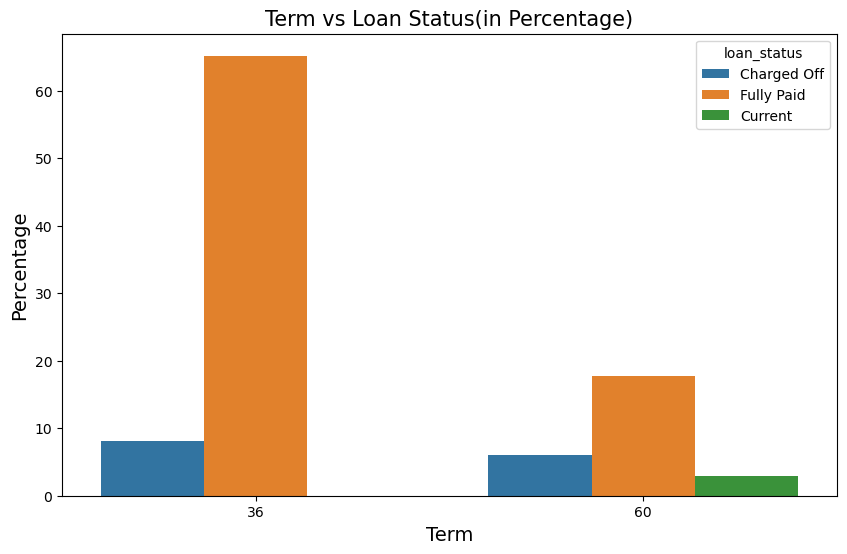

In [66]:
# loan_status vs term
loan_status_vs_term = loan_df.groupby(["term", "loan_status"])[["loan_amnt"]].count()
loan_status_vs_term["percentage"] = (loan_status_vs_term["loan_amnt"] / len(loan_df)) * 100
loan_status_vs_term.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
axis = sns.barplot(data=loan_status_vs_term, x="term", y="percentage", hue="loan_status")
axis.set_title('Term vs Loan Status(in Percentage)',fontsize=15)
plt.xlabel('Term', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

# Found out - Longer term has a high charged off percentage

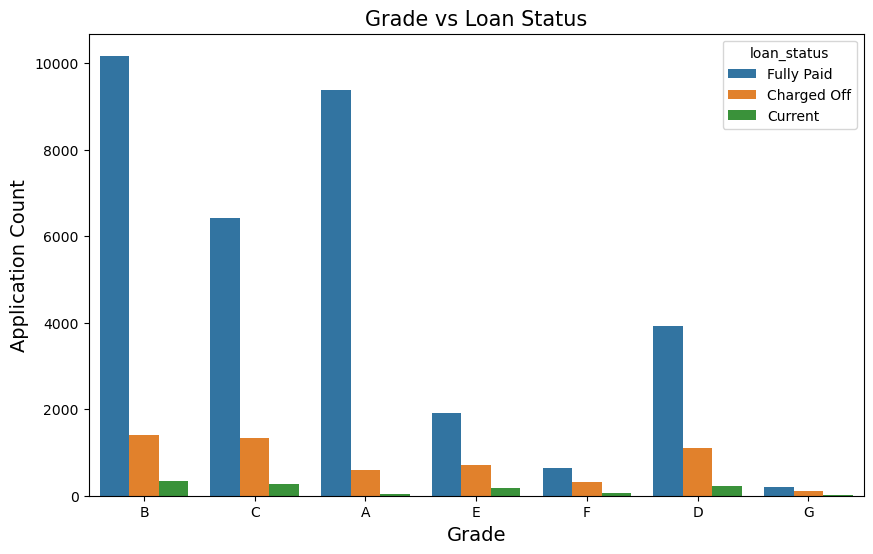

In [67]:
# loan_status vs grade
plt.figure(figsize=(10, 6))
axis = sns.countplot(data=loan_df, x="grade", hue="loan_status")
axis.set_title('Grade vs Loan Status',fontsize=15)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Application Count', fontsize=14)
plt.show()

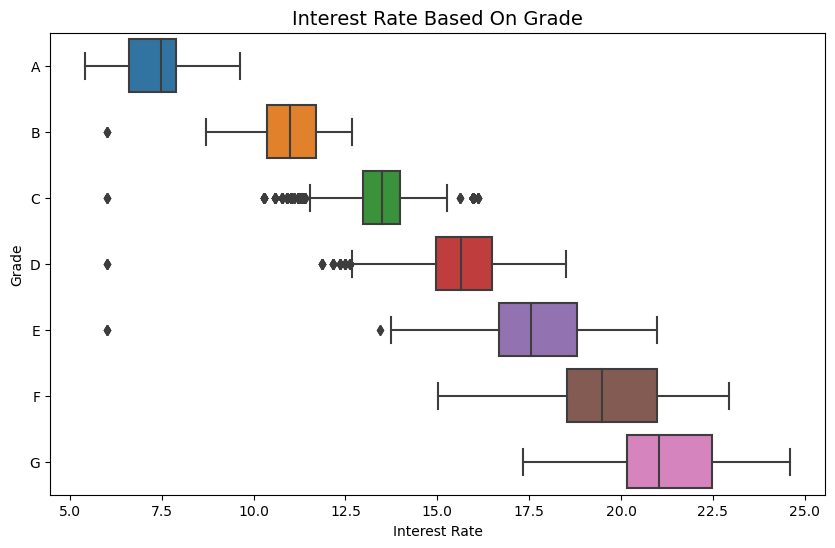

In [68]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_df, x='int_rate', y='grade', order=["A", "B", "C", "D", "E", "F", "G"])
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Interest Rate Based On Grade', fontsize=14)
plt.show()

# With Grade, interst rate is directly propotional

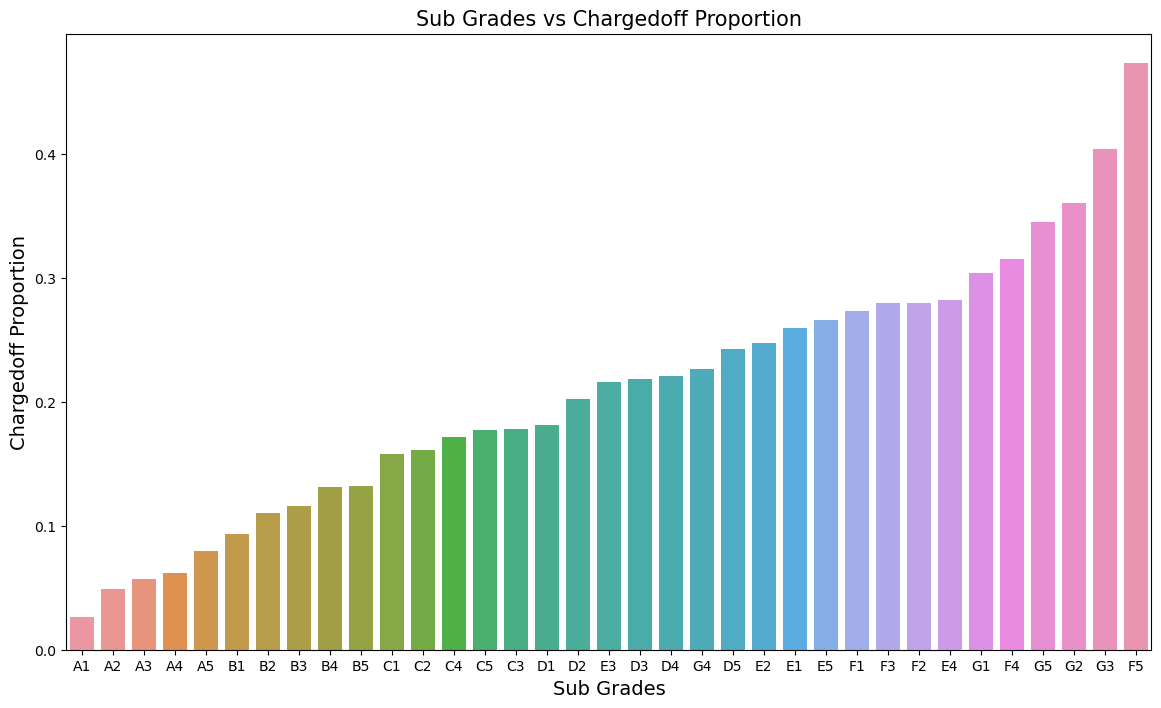

In [69]:
# loan_status vs sub_grade
sub_grade_vs_loan = loan_df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
sub_grade_vs_loan['Total'] = sub_grade_vs_loan['Charged Off'] + sub_grade_vs_loan['Current'] + sub_grade_vs_loan['Fully Paid'] 
sub_grade_vs_loan['Chargedoff_Proportion'] = sub_grade_vs_loan['Charged Off'] / sub_grade_vs_loan['Total']
sub_grade_vs_loan = sub_grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=True)

fig, axis = plt.subplots(figsize=(14, 8))
axis.set_title('Sub Grades vs Chargedoff Proportion', fontsize=15)
axis = sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=sub_grade_vs_loan)
axis.set_xlabel('Sub Grades', fontsize=14)
axis.set_ylabel('Chargedoff Proportion', fontsize=14)
plt.show()

# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

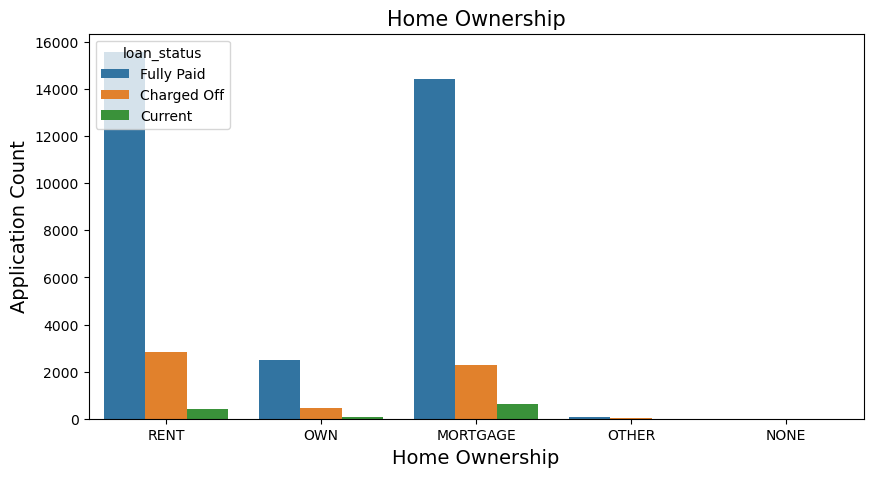

In [70]:
# loan_status vs home_ownership
plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df, x="home_ownership", hue='loan_status')
ax.set_title('Home Ownership', fontsize=15)
ax.set_xlabel('Home Ownership', fontsize=14)
ax.set_ylabel('Application Count', fontsize=14)      
plt.show()

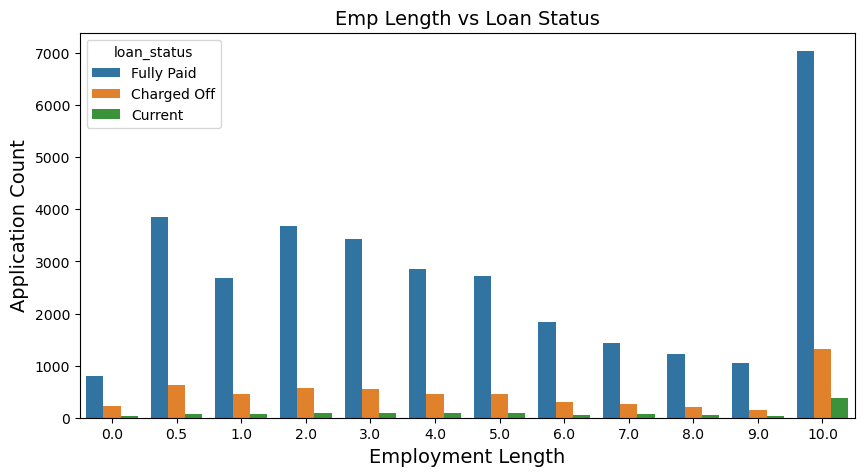

In [71]:
# loan_status vs emp_length
plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df, x="emp_length", hue='loan_status')
ax.set_title('Emp Length vs Loan Status', fontsize=14)
ax.set_ylabel('Application Count', fontsize=14)
ax.set_xlabel('Employment Length', fontsize=14)      
plt.show()

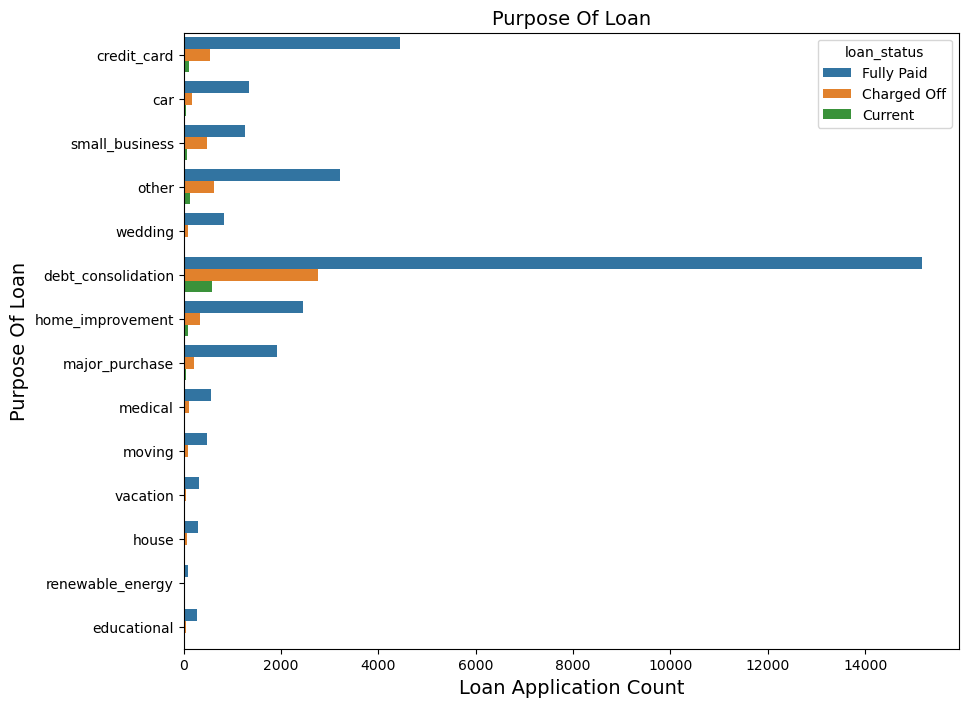

In [72]:
# loan_status vs purpose
plt.figure(figsize=(10,8))
ax = sns.countplot(data=loan_df,y="purpose",hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=14)
ax.set_ylabel('Purpose Of Loan',fontsize=14)
ax.set_xlabel('Loan Application Count',fontsize=14)      
plt.show()

# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

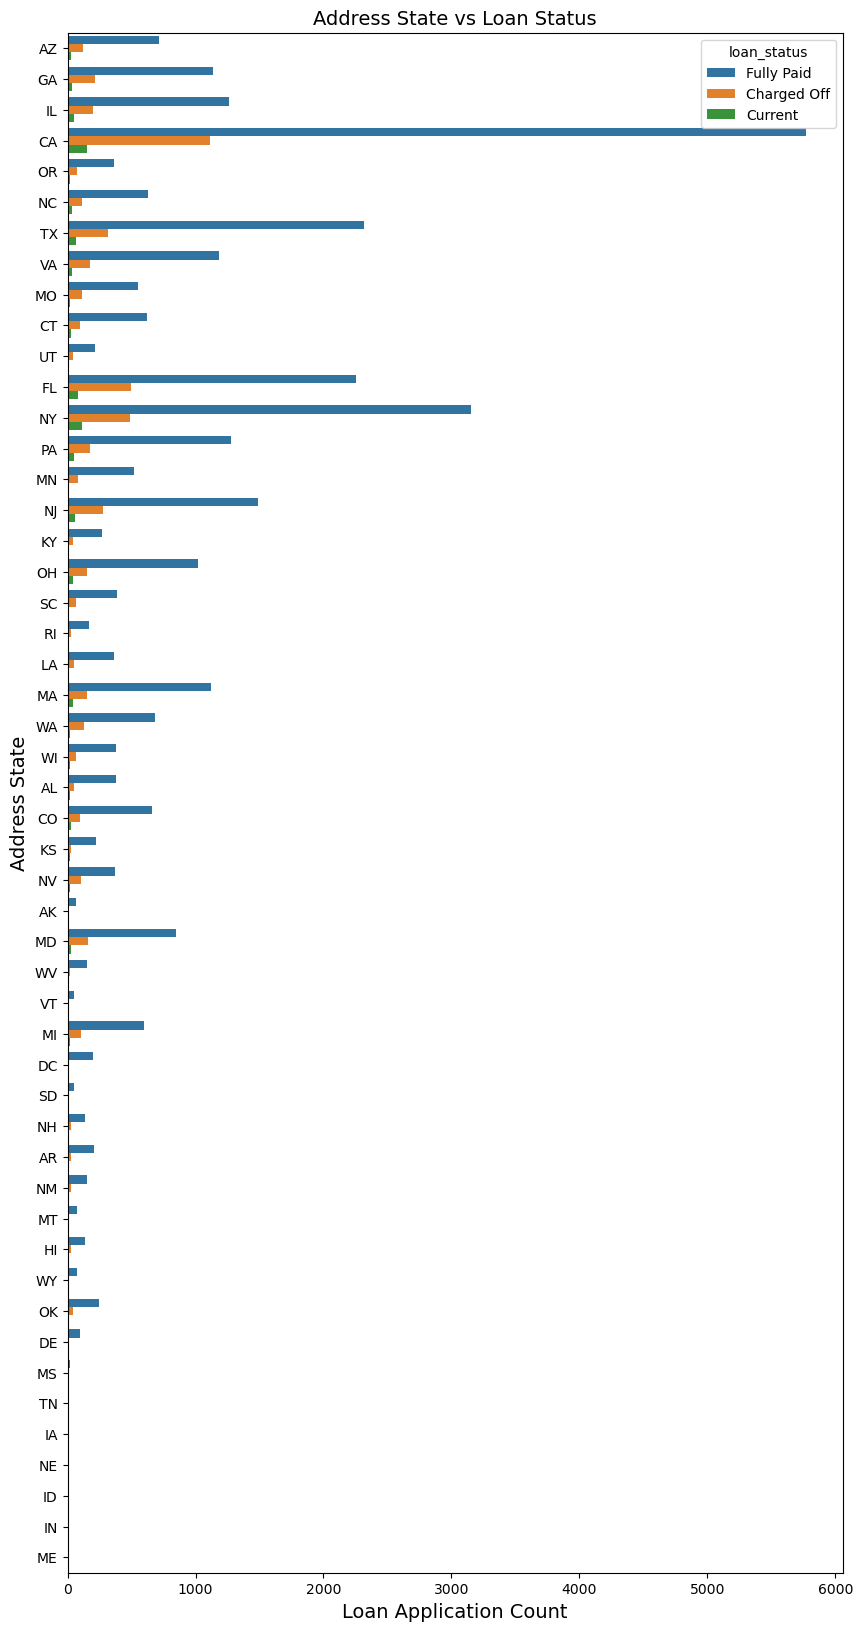

In [73]:
# loan_status vs addr_state

plt.figure(figsize=(10,20))
ax = sns.countplot(data=loan_df,y="addr_state",hue='loan_status')
ax.set_title('Address State vs Loan Status',fontsize=14)
ax.set_ylabel('Address State',fontsize=14)
ax.set_xlabel('Loan Application Count',fontsize=14)      
plt.show()

# Chart Shows a high number of application came from state CA, FL, NY so charged Off Propertion is also high

In [74]:
# addr_state vs charged off Percentage

addr_state_vs_loan_status = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Current'] + addr_state_vs_loan_status['Fully Paid'] 
addr_state_vs_loan_status['Charged Off Percentage'] = addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total']
addr_state_vs_loan_status.sort_values('Charged Off Percentage', ascending=False, inplace=True)
addr_state_vs_loan_status

# State - NE has high chance on charged off Percent but the number of applocations also very less
# Applications from the state NV, FL, MO has high chance of charged off Percentage

loan_status addr_state  Charged Off  Current  Fully Paid   Total  \
28                  NE          3.0      0.0         2.0     5.0   
32                  NV        107.0     17.0       368.0   492.0   
40                  SD         12.0      2.0        50.0    64.0   
0                   AK         14.0      2.0        63.0    79.0   
9                   FL        497.0     85.0      2252.0  2834.0   
24                  MO        114.0     16.0       551.0   681.0   
13                  ID          1.0      0.0         5.0     6.0   
31                  NM         30.0      5.0       149.0   184.0   
11                  HI         28.0      8.0       138.0   174.0   
4                   CA       1116.0    149.0      5767.0  7032.0   
36                  OR         71.0     16.0       364.0   451.0   
43                  UT         40.0      6.0       211.0   257.0   
20                  MD        161.0     26.0       849.0  1036.0   
10                  GA        215.0     38.0      1135.0  1388.0   
46                  WA        127.0     22.0       684.0   833.0   
30                  NJ        277.0     59.0      1490.0  1826.0   
29                  NH         25.0      5.0       139.0   169.0   
27                  NC        114.0     38.0       629.0   781.0   
22                  MI        102.0     16.0       596.0   714.0   
39                  SC         66.0     13.0       389.0   468.0   
3                   AZ        121.0     30.0       718.0   869.0   
17                  KY         45.0     13.0       266.0   324.0   
47                  WI         63.0     20.0       376.0   459.0   
35                  OK         40.0     12.0       246.0   298.0   
23                  MN         81.0     10.0       522.0   613.0   
14                  IL        196.0     47.0      1262.0  1505.0   
33                  NY        488.0    111.0      3156.0  3755.0   
26                  MT         11.0      2.0        72.0    85.0   
38                  RI         25.0      4.0       165.0   194.0   
6                   CT         94.0     24.0       618.0   736.0   
44                  VA        176.0     38.0      1182.0  1396.0   
34                  OH        153.0     44.0      1020.0  1217.0   
5                   CO         97.0     26.0       659.0   782.0   
18                  LA         53.0      9.0       367.0   429.0   
1                   AL         54.0     17.0       378.0   449.0   
48                  WV         21.0      5.0       151.0   177.0   
19                  MA        156.0     42.0      1123.0  1321.0   
37                  PA        178.0     49.0      1281.0  1508.0   
41                  TN          2.0      0.0        15.0    17.0   
42                  TX        313.0     66.0      2315.0  2694.0   
16                  KS         31.0     16.0       224.0   271.0   
45                  VT          6.0      1.0        47.0    54.0   
2                   AR         27.0     10.0       208.0   245.0   
25                  MS          2.0      0.0        17.0    19.0   
8                   DE         12.0      1.0       101.0   114.0   
7                   DC         15.0      3.0       196.0   214.0   
49                  WY          4.0      3.0        76.0    83.0   
21                  ME          0.0      0.0         3.0     3.0   
15                  IN          0.0      0.0         9.0     9.0   
12                  IA          0.0      0.0         5.0     5.0   

loan_status  Charged Off Percentage  
28                         0.600000  
32                         0.217480  
40                         0.187500  
0                          0.177215  
9                          0.175371  
24                         0.167401  
13                         0.166667  
31                         0.163043  
11                         0.160920  
4                          0.158703  
36                         0.157428  
43                         0.155642  
20                         0.155405  

In [75]:
# addr_state vs purpose and investor approved amountbucket where minimum charged off count is 25

addr_state_vs_loan_status = loan_df.groupby(['addr_state', 'purpose', 'funded_amnt_inv_buckets', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Current'] + addr_state_vs_loan_status['Fully Paid'] 
addr_state_vs_loan_status['Charged Off Percentage'] = addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total']
addr_state_vs_loan_status.sort_values('Charged Off Percentage', ascending=False, inplace=True)
addr_state_vs_loan_status[addr_state_vs_loan_status["Charged Off"] > 25]

# Applications from the state NJ for Debt Consolidation on the range (0-5000) is more and same for CA for purpose "other"
# Investor approve (20000 - 25000) State NY, CA for the Debt Consolidation and charge of percent is also high, so it looks a risk to business

loan_status addr_state             purpose funded_amnt_inv_buckets  \
2532                NJ  debt_consolidation                  0-5000   
390                 CA               other                  0-5000   
768                 FL  debt_consolidation                  0-5000   
2788                NY  debt_consolidation           20000 - 25000   
769                 FL  debt_consolidation              5000-10000   
352                 CA  debt_consolidation           20000 - 25000   
2787                NY  debt_consolidation             15000-20000   
348                 CA  debt_consolidation                  0-5000   
351                 CA  debt_consolidation             15000-20000   
3540                TX  debt_consolidation                  0-5000   
770                 FL  debt_consolidation             10000-15000   
853                 GA  debt_consolidation              5000-10000   
1189                IL  debt_consolidation              5000-10000   
2826                NY               other                  0-5000   
2534                NJ  debt_consolidation             10000-15000   
349                 CA  debt_consolidation              5000-10000   
343                 CA         credit_card              5000-10000   
350                 CA  debt_consolidation             10000-15000   
2784                NY  debt_consolidation                  0-5000   
2786                NY  debt_consolidation             10000-15000   
391                 CA               other              5000-10000   
2785                NY  debt_consolidation              5000-10000   
1609                MA  debt_consolidation              5000-10000   
2533                NJ  debt_consolidation              5000-10000   
344                 CA         credit_card             10000-15000   
3541                TX  debt_consolidation              5000-10000   

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Percentage  
2532                  33        1         123    157                0.210191  
390                   66        4         257    327                0.201835  
768                   50        5         197    252                0.198413  
2788                  30        3         119    152                0.197368  
769                   80        6         353    439                0.182232  
352                   49       18         204    271                0.180812  
2787                  45       15         202    262                0.171756  
348                  109        7         525    641                0.170047  
351                   79       15         385    479                0.164927  
3540                  34        0         173    207                0.164251  
770                   47       11         233    291                0.161512  
853                   28        0         156    184                0.152174  
1189                  33        0         187    220                0.150000  
2826                  31        5         171    207                0.149758  
2534                  33        7         186    226                0.146018  
349                  159       10         922   1091                0.145738  
343                   55        0         328    383                0.143603  
350                  114       26         673    813                0.140221  
2784                  39        4         246    289                0.134948  
2786                  58       10         365    433                0.133949  
391                   31        7         196    234                0.132479  
2785                  76       11         524    611                0.124386  
1609                  26        0         186    212                0.122642  
2533                  36        4         256    296                0.121622  
344                   28        6         202    236                0.118644  
3541                  32        0         337    369   

In [76]:
# dti vs loan_status propertion
dti_buckets_vs_loan_status = loan_df.groupby(['dti_buckets', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_buckets_vs_loan_status['Total'] = dti_buckets_vs_loan_status['Charged Off'] + dti_buckets_vs_loan_status['Current'] + dti_buckets_vs_loan_status['Fully Paid'] 
dti_buckets_vs_loan_status['Charged Off Percent'] = dti_buckets_vs_loan_status['Charged Off'] / dti_buckets_vs_loan_status['Total']
dti_buckets_vs_loan_status.sort_values('Charged Off Percent', ascending=False, inplace=True)
dti_buckets_vs_loan_status

# With the increase in DTI Charged off Percent also getting increased
# With DTI 25+ less number of applications are filed and also the DTI got reduced

loan_status dti_buckets  Charged Off  Current  Fully Paid  Total  \
4                 20-25         1116      237        5455   6808   
3                 15-20         1385      282        7400   9067   
2                 10-15         1392      268        8165   9825   
5                   25+           87       53         535    675   
1                  5-10          996      191        6749   7936   
0                   0-5          580       90        4157   4827   

loan_status  Charged Off Percent  
4                       0.163925  
3                       0.152752  
2                       0.141679  
5                       0.128889  
1                       0.125504  
0                       0.120157

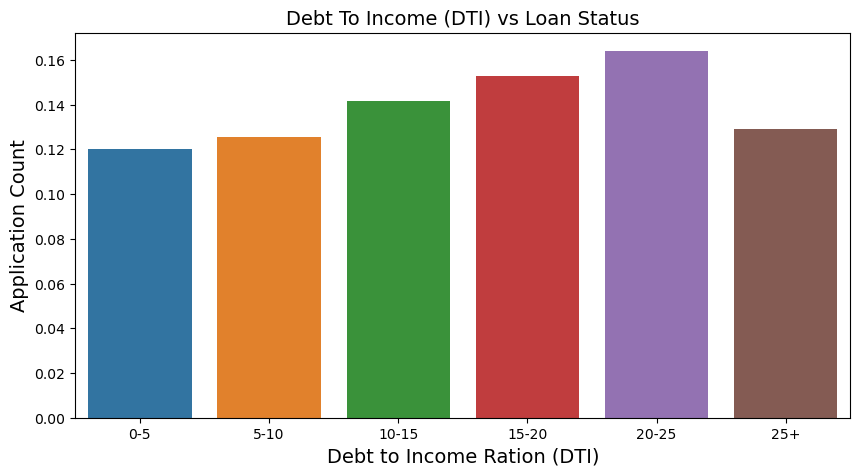

In [77]:
# loan_status vs dti
plt.figure(figsize=(10,5))
ax = sns.barplot(data=dti_buckets_vs_loan_status, x="dti_buckets", y="Charged Off Percent")
ax.set_title('Debt To Income (DTI) vs Loan Status',fontsize=14)
ax.set_ylabel('Application Count', fontsize=14)
ax.set_xlabel('Debt to Income Ration (DTI)', fontsize=14)      
plt.show()
#  With the increase in DTI Chared off also getting increased

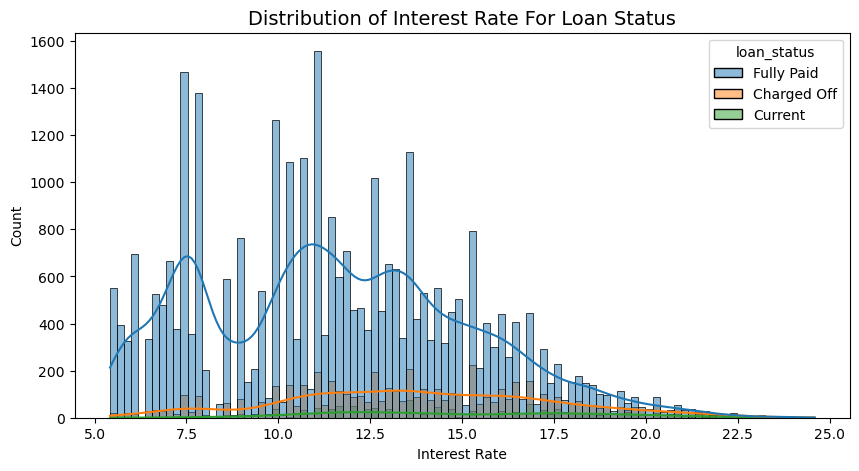

In [78]:
# Distribution of int_rate based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df, x='int_rate' ,hue='loan_status', bins=100, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status', fontsize=14)
plt.show()

# The Charged-off count increases with interest rate and shows are decline after 17.5%

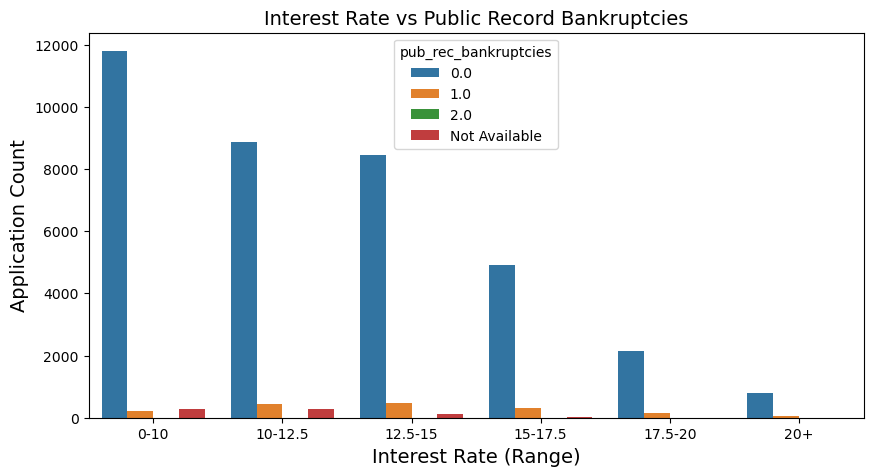

In [79]:
# pub_rec_bankruptcies vs int_rate
plt.figure(figsize=(10,5))
ax = sns.countplot(data=loan_df, x="int_rate_buckets", hue="pub_rec_bankruptcies")
ax.set_title('Interest Rate vs Public Record Bankruptcies', fontsize=14)
ax.set_ylabel('Application Count', fontsize=14)
ax.set_xlabel('Interest Rate (Range)', fontsize=14)      
plt.show()

# Applicants have any Public Record related to Bankruptcies are on the higher Interest Rate

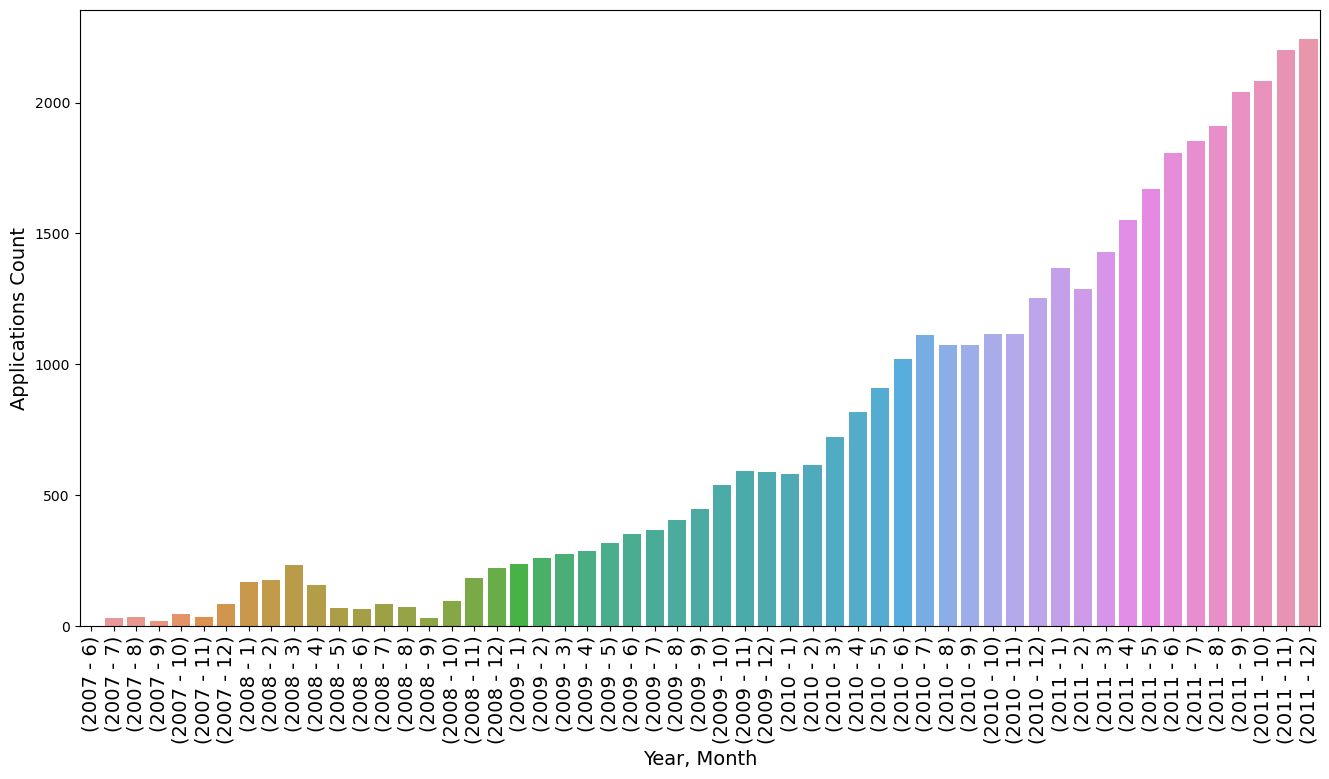

In [80]:
# Loan Application Counts per Year-Month
plt.figure(figsize=(16,8))
application_per_month = loan_df.groupby(['issue_year','issue_month']).count().reset_index()
application_per_month["x_label"] = application_per_month.apply(lambda record: f"({record.issue_year} - {record.issue_month})", axis=1)
application_per_month["y_label"] = application_per_month.loan_amnt

application_per_month = application_per_month[["issue_year", "issue_month", "x_label", "y_label"]]
application_per_month.sort_values(["issue_year", "issue_month"], inplace=True)

sns.barplot(data=application_per_month, x="x_label", y="y_label")
plt.xlabel('Year, Month',fontsize=14) 
plt.ylabel('Applications Count', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()
# A clear decrese in Loan Application During the year 2008 and after that there is a continious increase in loan application

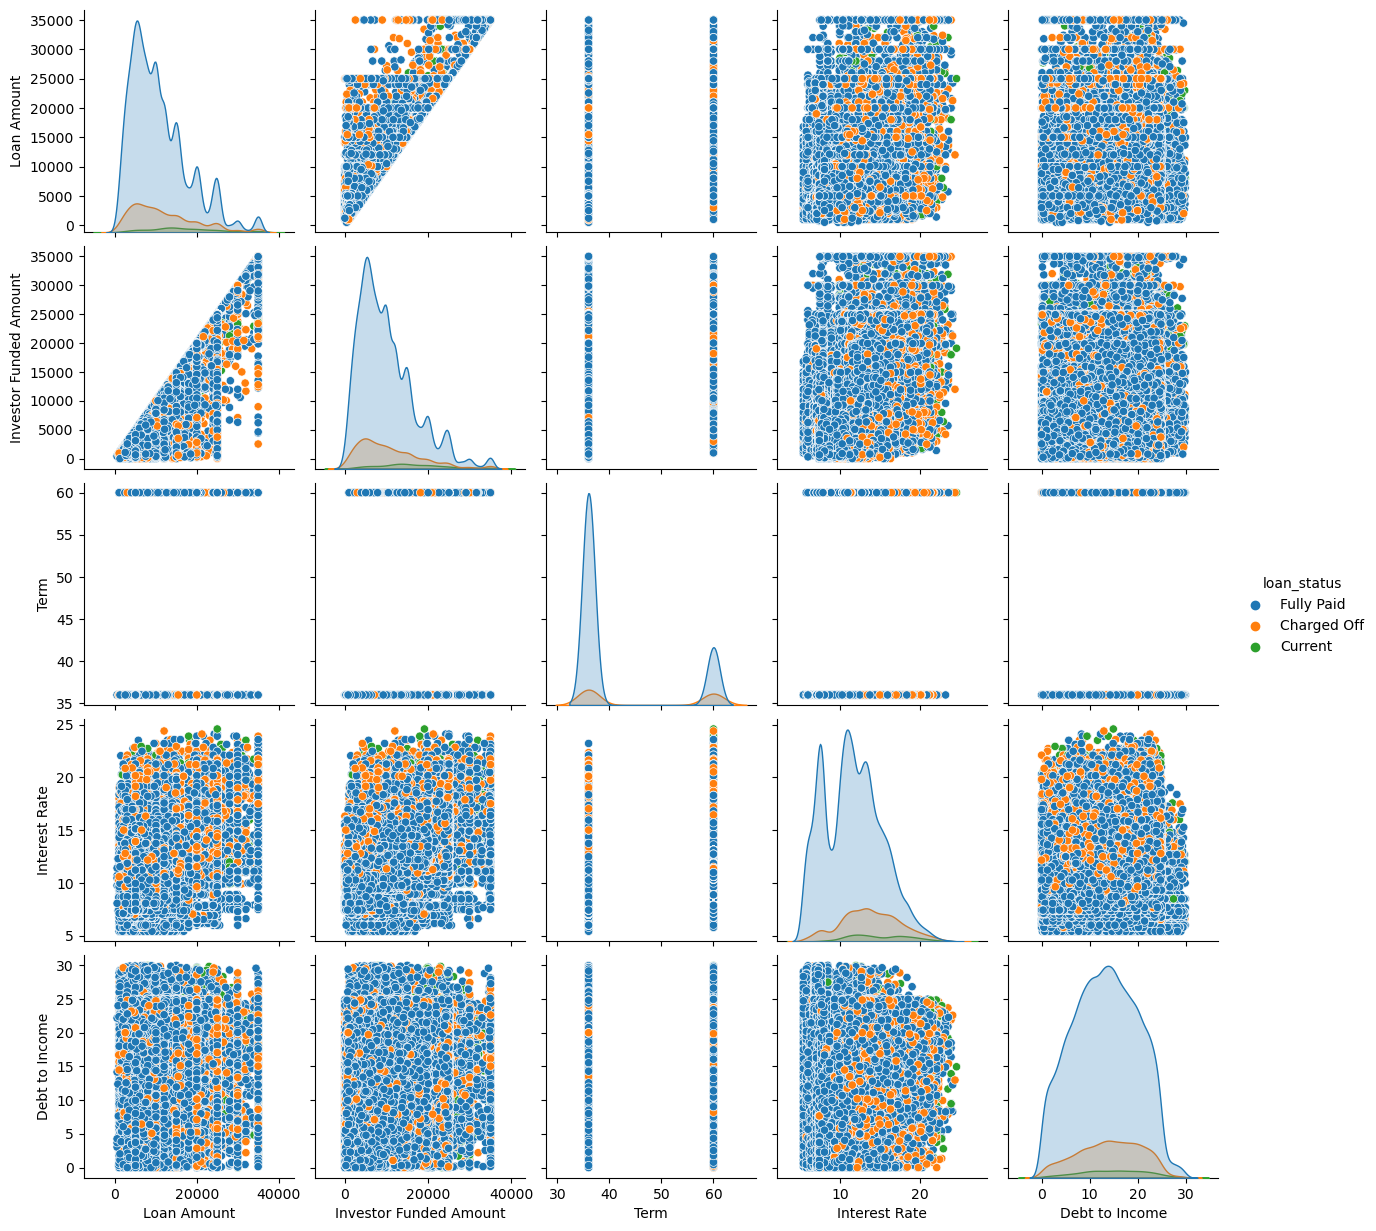

In [81]:
pairplot_columns = ["loan_amnt", "funded_amnt_inv", "term", "int_rate", "dti", "pub_rec_bankruptcies", "loan_status"]
sns.pairplot(loan_df[pairplot_columns].rename(columns=descriptive_column_names), hue="loan_status")
plt.show()
# Plot depicts high chance of Charged-off if investor approves in the range [0-5000] with high interest rate

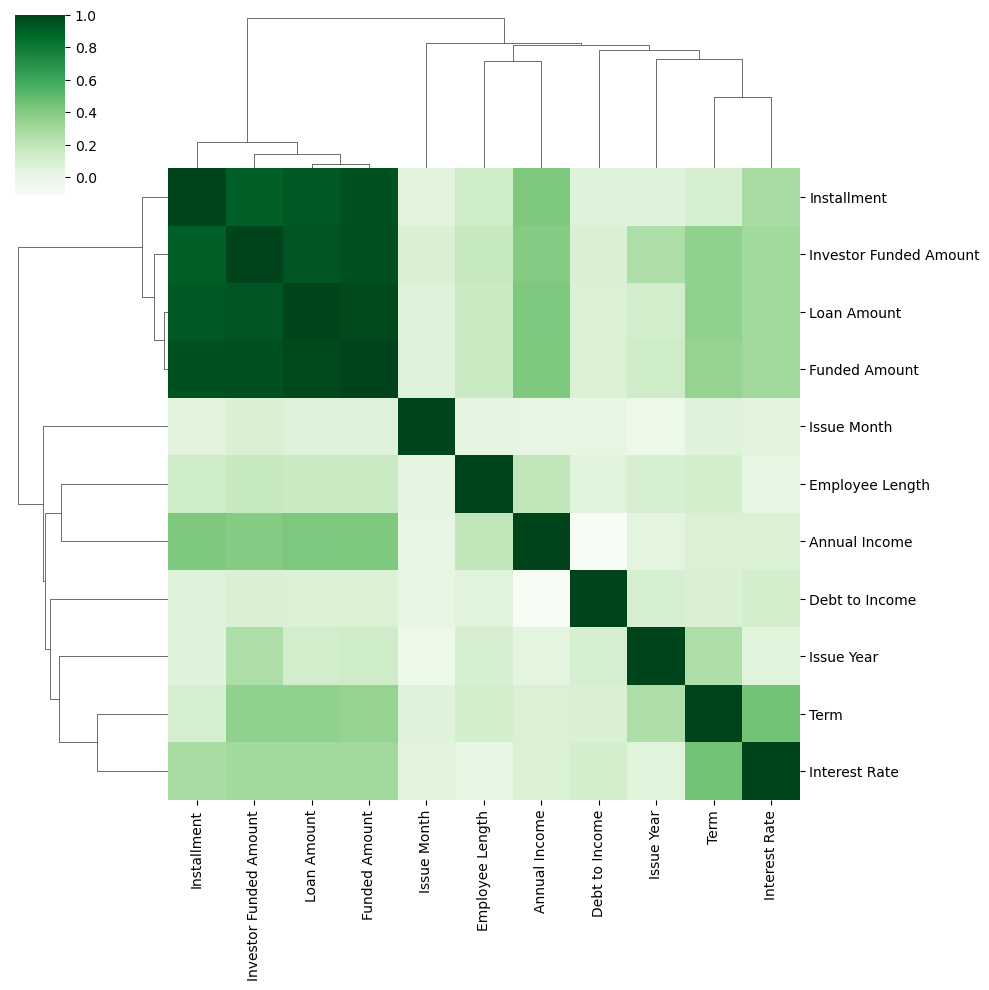

In [82]:
# Clustermap shows co-relation among numerical variables.
sns.clustermap(loan_df.rename(columns=descriptive_column_names).corr(), cmap="Greens")
plt.show()
# Loan amount, investor amount, funding amount and installment are strongly correlated.
# Annual Income to DTI are negatively co-related i.e employee with more annual income will result to low DTI
# Positive co-relation among employee length and annual income i.e employee having more experience have more Annual Income

# Recommendation


<table>
<tr><th colspan=2 style="text-align: left">Driving Factors</th></tr>
<tr>
  <td style="text-align: left; width: 200px;"><strong>Public record bankruptcies</strong></td>
  <td style="text-align: left">Applications with bankruptcies records should be rejected.</td>
</tr>
<tr>
  <td style="text-align: left; width: 200px;"><strong>Term</strong></td>
  <td style="text-align: left">Applicants with long term has hight percentage of changed off and we should deny those.</td>
</tr>
<tr>
  <td style="text-align: left; width: 200px;"><strong>Annual income</strong></td>
  <td style="text-align: left">There is high risk involved with applicants with high annual income.</td>
</tr>
<tr>
  <td style="text-align: left; width: 200px;"><strong>DTI</strong></td>
  <td style="text-align: left">Increase in DTI Charged off also getting increased. So, we should wisely consider these applicant.</td>
</tr>
<tr>
  <td style="text-align: left; width: 200px;"><strong>Interest Rate</strong></td>
  <td style="text-align: left">High rate are not defensive to become a default, so better strategy could be deny those particular applicants.</td>
</tr>
<tr>
  <td style="text-align: left; width: 200px;"><strong>Address State</strong></td>
  <td style="text-align: left">Applications from the state NV, FL, MO has high chance of charged off. Therefore denying loans to risky individuals may be better strategy.</td>
</tr>
<tr>
  <td style="text-align: left; width: 200px;"><strong>Purpose and Funded Amount (Investor)</strong></td>
  <td style="text-align: left">Investor approved amount in bucket (20000 - 25000) has high risk involved.</td>
</tr>
</table>